# The life of an athlete with type 1 diabetes: descriptives

Descriptives for the 2019 training season of 14 TNN athletes

In [1]:
import numpy as np
import pandas as pd
import datetime
import os
from copy import copy

from calc import glucose_levels, mmoll_mgdl, mgdl_mmoll, timestamp_to_seconds
from config import DATA_PATH

In [2]:
SAVE_PATH = 'results/'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

In [3]:
COL = 'Glucose Value (mg/dL)'
SECTIONS = ('wake', 'exercise', 'recovery', 'sleep')

### Read data

**Athlete characteristics**

In [4]:
info = pd.read_csv(DATA_PATH+'agg/info.csv')
info = info.reset_index()
info = info.rename(columns={'index':'RIDER'})
info

,RIDER,gender,nationality,age,diabetes_duration,weight,bf(%),HbA1c,FTP,LTHR,HRmax,VO2max,height
0,1,M,Switzerland,22,11,60.500000,9.066667,6.7,307.000000,176.333333,192.333333,68.888889,174.0
1,2,M,Italy,30,14,71.633333,8.833333,6.6,326.000000,168.666667,181.666667,66.915285,178.0
2,3,M,Ireland,26,7,66.733333,6.566667,6.8,298.000000,171.000000,180.000000,66.666164,171.0
3,4,M,Australia,19,7,78.666667,9.433333,7.8,356.000000,170.333333,187.333333,67.333333,178.0
4,5,M,Netherlands,25,6,69.633333,7.700000,6.5,341.000000,179.666667,192.666667,72.857143,183.0
5,6,M,Australia,20,9,56.700000,4.950000,6.4,298.500000,173.000000,184.500000,70.781588,169.0
6,7,M,Italy,22,6,65.333333,8.066667,5.9,298.500000,171.500000,180.500000,72.203125,167.0
7,8,M,New Zealand,20,17,65.000000,11.900000,7.7,292.000000,187.000000,204.000000,64.000000,165.0
8,9,M,France,23,10,63.100000,8.533333,7.2,278.666667,182.333333,195.000000,67.522310,173.0
9,10,M,UK,27,17,75.466667,7.700000,7.3,377.333333,177.000000,194.333333,73.982571,185.0


**Professional**

In [5]:
pro = pd.read_csv(DATA_PATH+'info/pro.csv')
pro = pro.sort_values('RIDER')

Select only people for whom we have *ethics*

In [6]:
pro = pro[pro.ethics == 1]
pro = pro.drop('ethics', axis=1)

# anonymize file
pro = pro.drop('name', axis=1)
pro['RIDER'] = pro['RIDER'].astype(int)
pro = pro.reset_index(drop=True)

pro

,RIDER,2014,2015,2016,2017,2018,2019,2020,2021
0,1,-,-,-,DEV,DEV,PRO,PRO,PRO
1,2,PRO,PRO,PRO,PRO,PRO,PRO,PRO,PRO
2,3,PRO,PRO,PRO,PRO,PRO,PRO,PRO,PRO
3,4,-,-,-,DEV,PRO,PRO,PRO,PRO
4,5,-,PRO,PRO,PRO,PRO,PRO,PRO,PRO
5,6,-,-,-,DEV,DEV,PRO,PRO,PRO
6,7,-,-,DEV,PRO,PRO,PRO,PRO,PRO
7,8,-,-,-,DEV,DEV,DEV,PRO,PRO
8,9,-,-,-,PRO,PRO,PRO,PRO,PRO
9,10,-,-,DEV,DEV,PRO,PRO,PRO,PRO


**Season dates**

In [7]:
season = pd.read_csv(DATA_PATH+'calendar/season_dates.csv', index_col=[0,1], header=[0,1])
season = season.reset_index().drop('level_1', axis=1)
season = season.rename(columns={'level_0':'RIDER'})
season

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


RIDER        2015                    2016                    2017  \
               start         end       start         end       start   
0      1         NaN         NaN         NaN         NaN  2016-12-06   
1      2  2014-11-17  2015-10-18  2015-11-24  2016-10-28  2016-11-15   
2      3  2014-11-06  2015-10-18  2015-11-06  2016-10-23  2016-12-06   
3      4         NaN         NaN         NaN         NaN  2016-11-15   
4      5  2014-11-14  2015-11-08  2015-11-27  2016-10-30  2016-11-12   
5      6         NaN         NaN         NaN         NaN  2016-12-12   
6      7         NaN         NaN  2015-10-07  2016-04-16  2016-11-07   
7      8         NaN         NaN         NaN         NaN  2016-12-14   
8      9         NaN         NaN         NaN         NaN  2016-12-06   
9     10         NaN         NaN  2015-11-06  2016-10-17  2016-11-04   
10    11  2014-11-02  2015-11-12  2015-12-01  2016-11-12  2016-12-07   
11    12  2014-11-15  2015-10-29  2015-11-24  2016-10-22  2016-11-07   
12    13         NaN         NaN         NaN         NaN         NaN   
13    14  2014-11-14  2015-10-25  2015-12-02  2016-10-30  2016-11-13   
14    15  2014-11-17  2015-10-18  2015-11-12  2016-10-23  2016-11-14   
15    16         NaN         NaN         NaN         NaN  2016-12-14   
16    17         NaN         NaN         NaN         NaN         NaN   
17    18         NaN         NaN         NaN         NaN  2016-12-13   

                      2018                    2019                    2020  \
           end       start         end       start         end       start   
0   2017-11-05  2017-11-13  2018-10-20  2018-11-05  2019-10-20  2019-11-04   
1   2017-09-11  2017-10-23  2018-10-02  2018-10-23  2019-10-16  2019-11-04   
2   2017-10-05  2017-11-13  2018-10-31  2018-11-19  2019-10-20  2019-11-13   
3   2017-09-30  2017-10-05  2018-11-01  2018-11-12  2019-10-16  2019-11-04   
4   2017-09-23  2017-10-03  2018-10-17  2018-11-12  2019-10-20  2019-11-11   
5   2017-10-14  2017-10-30  2018-10-25  2018-12-01  2019-10-01  2019-10-21   
6   2017-11-05  2017-11-28  2018-10-17  2018-11-29  2019-10-27  2019-12-02   
7   2017-11-05  2017-11-19  2018-12-12  2018-12-24  2019-10-16  2019-10-24   
8   2017-11-05  2017-11-20  2018-09-24  2018-11-05  2019-09-23  2019-10-14   
9   2017-11-12  2017-11-27  2018-11-10  2018-11-22  2019-10-28  2019-11-11   
10  2017-10-22         NaN         NaN  2018-10-15  2019-06-23  2019-10-23   
11  2017-10-31  2017-11-06  2018-11-11  2018-11-26  2019-11-05  2019-11-18   
12         NaN         NaN         NaN  2018-12-12  2019-10-20  2019-11-18   
13  2017-11-20  2017-12-21  2018-11-01  2018-11-12  2019-09-09  2019-10-21   
14  2017-11-01  2017-11-27  2018-10-21  2018-11-12  2019-10-20  2019-11-09   
15  2017-09-10  2017-11-21  2018-11-02  2018-11-19  2019-09-29  2019-11-14   
16         NaN         NaN         NaN         NaN         NaN         NaN   
17  2017-10-22  2017-11-20  2018-08-12  2018-10-22  2019-10-13  2019-11-09   

                      2021              
           end       start         end  
0   2020-09-23  2020-10-08  2021-10-30  
1   2020-10-11  2020-11-09  2021-10-04  
2   2020-10-16  2020-11-16  2021-10-03  
3   2020-10-28  2020-11-16  2021-08-14  
4   2020-10-31  2020-11-16  2021-08-31  
5   2020-07-17  2020-11-01  2021-09-03  
6   2020-10-12  2020-11-09  2021-09-30  
7   2020-09-27  2020-11-01  2021-10-03  
8   2020-10-12  2020-11-05  2021-10-01  
9   2020-10-11  2020-11-16  2021-10-17  
10  2020-10-02  2020-11-01  2021-09-17  
11  2020-10-08  2020-11-01  2021-09-03  
12  2020-10-11  2020-11-16  2021-09-05  
13  2020-10-12  2020-11-02  2021-09-20  
14  2020-10-15  2020-11-07  2021-10-29  
15  2020-10-31  2020-11-23  2021-09-30  
16         NaN         NaN         NaN  
17  2020-10-18  2020-11-11  2021-10-05

**TrainingPeaks (aggregated)**

In [8]:
tp_agg = pd.read_csv(DATA_PATH+'agg/trainingpeaks_day.csv', index_col=[0,1], header=[0,1])
tp_agg = tp_agg.reset_index()
tp_agg['date'] = pd.to_datetime(tp_agg['date'])
tp_agg

RIDER       date            TIME                       \
                       timestamp_count  local_timestamp_min   
0         1 2016-11-22          7446.0  2016-11-22 12:58:57   
1         1 2016-11-23          7312.0  2016-11-23 14:29:13   
2         1 2016-11-24          6285.0  2016-11-24 09:53:38   
3         1 2016-11-26          7445.0  2016-11-26 10:00:35   
4         1 2016-12-06         11222.0  2016-12-06 09:11:34   
...     ...        ...             ...                  ...   
30208    18 2021-11-18          4767.0  2021-11-18 14:58:17   
30209    18 2021-11-25         10912.0  2021-11-25 09:50:57   
30210    18 2021-11-26          8737.0  2021-11-26 10:12:34   
30211    18 2021-11-27         18222.0  2021-11-27 09:31:58   
30212    18 2021-11-28         14549.0  2021-11-28 10:02:22   

                           CALENDAR                                   \
       local_timestamp_max     race travel race_3d_mean race_7d_mean   
0      2016-11-22 15:15:40    False   True          0.0          0.0   
1      2016-11-23 16:35:14    False  False          0.0          0.0   
2      2016-11-24 16:56:38    False  False          0.0          0.0   
3      2016-11-26 12:12:52    False  False          0.0          0.0   
4      2016-12-06 16:11:38    False  False          0.0          0.0   
...                    ...      ...    ...          ...          ...   
30208  2021-11-18 16:19:15    False  False          0.0          0.0   
30209  2021-11-25 12:54:14    False  False          0.0          0.0   
30210  2021-11-26 12:39:08    False  False          0.0          0.0   
30211  2021-11-27 14:36:43    False  False          0.0          0.0   
30212  2021-11-28 14:21:57    False  False          0.0          0.0   

                     ...          LOC                             \
      travel_3d_any  ... distance_min distance_max  distance_sum   
0              True  ...         3.02     60211.87  2.176246e+08   
1              True  ...         0.00     66126.45  2.425919e+08   
2              True  ...         3.43     34317.18  1.010690e+08   
3             False  ...         1.10     65340.95  2.508262e+08   
4             False  ...         0.00     64799.24  2.959160e+08   
...             ...  ...          ...          ...           ...   
30208         False  ...         0.00     29709.74  6.085284e+07   
30209         False  ...         0.00     80574.10  4.163251e+08   
30210         False  ...         0.00     62597.98  2.700624e+08   
30211         False  ...         0.00    130010.95  1.110585e+09   
30212         False  ...         3.57    109086.89  8.207432e+08   

                                                                 \
      distance_energy distance_peaks  distance_rms distance_iqr   
0        8.726028e+12            0.0  34233.144437   31096.1225   
1        1.076261e+13            0.0  38365.484707   33609.8750   
2        2.181329e+12            1.0  18629.789432          NaN   
3        1.112146e+13            0.0  38649.918715   32615.2600   
4        1.209650e+13            1.0  32831.808756   34073.7050   
...               ...            ...           ...          ...   
30208    1.271899e+12            0.0  16334.420219          NaN   
30209    2.158806e+13            0.0  44478.959811          NaN   
30210    1.147066e+13            0.0  36233.729380          NaN   
30211    9.500620e+13            0.0  72206.776484   66054.0525   
30212    6.213176e+13            0.0  65349.195666   59253.8200   

                                                           
      distance_up_iqr acceleration_iqr elevation_gain_iqr  
0                 NaN              NaN                NaN  
1                 NaN              NaN                NaN  
2                 NaN              NaN                NaN  
3                 NaN              NaN                NaN  
4                 NaN              NaN                NaN  
...               ...              ...                ...  
30208       

**Dexcom (aggregated)**

In [9]:
dc_agg = pd.read_csv(DATA_PATH+'agg/dexcom_day.csv')
dc_agg['date'] = pd.to_datetime(dc_agg['date'])
dc_agg

/local/home/evanweenen/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (73,74) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RIDER,date,time_in_hypo_exercise,time_in_hypoL2_exercise,time_in_hypoL1_exercise,time_in_target_exercise,time_in_hyper_exercise,time_in_hyperL1_exercise,time_in_hyperL2_exercise,glucose_mean_exercise,...,glucose_std_14d,glucose_cv_14d,glucose_rate_14d,completeness_14d,count_14d,LBGI_14d,HBGI_14d,AUC_14d,hypo_14d,hyper_14d
0,1,2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False
1,1,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False
2,1,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False
3,1,2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False
4,1,2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52610,18,2021-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False
52611,18,2021-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False
52612,18,2021-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False
52613,18,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False


### Select data

In [10]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg.RIDER.unique()), "; D =", len(tp_agg))
print("Dexcom: N =", len(dc_agg.dropna(subset=['glucose_mean_1d']).RIDER.unique()), 
      "; D =", len(dc_agg.dropna(subset=['glucose_mean_1d'])))

Data available: 
TrainingPeaks: N = 18 ; D = 30213
Dexcom: N = 18 ; D = 11786


Select riders that were pro in 2019

In [11]:
ATHLETES = pro.loc[pro['2019'] == 'PRO', 'RIDER'].to_list()

In [12]:
info = info[info.RIDER.isin(ATHLETES)].set_index('RIDER')
season = season[season.RIDER.isin(ATHLETES)].set_index('RIDER')

In [13]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg[tp_agg.RIDER.isin(ATHLETES)].RIDER.unique()), 
      "; D =", len(tp_agg[tp_agg.RIDER.isin(ATHLETES)]))
print("Dexcom: N =", len(dc_agg[dc_agg['glucose_mean_1d'].notna() & dc_agg.RIDER.isin(ATHLETES)].RIDER.unique()), 
      "; D =", len(dc_agg[dc_agg['glucose_mean_1d'].notna() & dc_agg.RIDER.isin(ATHLETES)]))

Data available: 
TrainingPeaks: N = 14 ; D = 25116
Dexcom: N = 14 ; D = 9229


Select beginning and end of the training season in 2019

In [14]:
season = season['2019']

season['start'] = pd.to_datetime(season['start'])
season['end'] = pd.to_datetime(season['end'])

season_list = season.apply(lambda x: pd.date_range(x[0], x[1], freq='1D'), axis=1)\
    .apply(pd.Series).stack().reset_index().drop('level_1', axis=1).rename(columns={0:'date'})
season_list

,RIDER,date
0,1,2018-11-05
1,1,2018-11-06
2,1,2018-11-07
3,1,2018-11-08
4,1,2018-11-09
...,...,...
4642,16,2019-09-25
4643,16,2019-09-26
4644,16,2019-09-27
4645,16,2019-09-28


In [15]:
tp_agg = pd.merge(tp_agg, season_list, how='right', on=['RIDER', 'date'])

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [16]:
dc_agg = pd.merge(dc_agg, season_list, how='right', on=['RIDER', 'date'])

In [17]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg.RIDER.unique()), "; D =", len(tp_agg))
print("Dexcom: N =", len(dc_agg.dropna(subset=['glucose_mean_1d']).RIDER.unique()), 
      "; D =", len(dc_agg.dropna(subset=['glucose_mean_1d'])))
# TODO: TP dropna here!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Data available: 
TrainingPeaks: N = 14 ; D = 4647
Dexcom: N = 14 ; D = 3060


In [18]:
len(tp_agg)

4647

Select data with glucose completeness >= 70% and remove nans from dexcom data

In [19]:
dc_agg = dc_agg[dc_agg['completeness_1d'] >= 0.7]

#TODO: should we also dropna dc_agg?

In [20]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg.RIDER.unique()), "; D =", len(tp_agg))
print("Dexcom: N =", len(dc_agg.dropna(subset=['glucose_mean_1d']).RIDER.unique()), 
      "; D =", len(dc_agg.dropna(subset=['glucose_mean_1d'])))

Data available: 
TrainingPeaks: N = 14 ; D = 4647
Dexcom: N = 14 ; D = 2120


### Prepare features

Prepare time features

In [21]:
tp_agg[tp_agg[('HR', 'heart_rate_mean')] == 0]

RIDER       date            TIME                       \
                      timestamp_count  local_timestamp_min   
1661     5 2019-08-16          3642.0  2019-08-16 13:37:34   
1687     5 2019-09-11          3622.0  2019-09-11 16:30:52   
2365     9 2018-11-05          7277.0  2018-11-05 14:04:35   
2366     9 2018-11-06         10534.0  2018-11-06 15:01:34   
2367     9 2018-11-07          7277.0  2018-11-07 14:03:12   
2368     9 2018-11-08          3810.0  2018-11-08 14:43:57   
2370     9 2018-11-10          8037.0  2018-11-10 13:53:05   
2371     9 2018-11-11         14282.0  2018-11-11 14:06:30   
2372     9 2018-11-12          7473.0  2018-11-12 14:11:15   
3058    12 2018-12-25          3181.0  2018-12-25 19:16:10   
3697    14 2018-11-22         10625.0  2018-11-22 10:56:26   
3699    14 2018-11-24         18525.0  2018-11-24 10:47:43   
3700    14 2018-11-25         19870.0  2018-11-25 11:12:13   
3701    14 2018-11-26          3628.0  2018-11-26 15:34:39   
3702    14 2018-11-27         14918.0  2018-11-27 10:40:57   
3996    15 2018-11-19          2168.0  2018-11-19 12:44:25   
4001    15 2018-11-24          8919.0  2018-11-24 08:38:36   

                          CALENDAR                                   \
      local_timestamp_max     race travel race_3d_mean race_7d_mean   
1661  2019-08-16 14:38:15    False  False          0.0          0.0   
1687  2019-09-11 17:31:13    False  False          0.0          0.4   
2365  2018-11-05 16:06:56    False  False          0.0          0.0   
2366  2018-11-06 18:02:29    False  False          0.0          0.0   
2367  2018-11-07 16:05:17    False  False          0.0          0.0   
2368  2018-11-08 15:47:59    False  False          0.0          0.0   
2370  2018-11-10 16:07:09    False  False          0.0          0.0   
2371  2018-11-11 18:08:56    False  False          0.0          0.0   
2372  2018-11-12 16:27:10    False  False          0.0          0.0   
3058  2018-12-25 20:09:10    False  False          0.0          0.0   
3697  2018-11-22 14:12:17    False  False          0.0          0.0   
3699  2018-11-24 16:26:02    False  False          0.0          0.0   
3700  2018-11-25 17:35:54    False  False          0.0          0.0   
3701  2018-11-26 16:36:04    False  False          0.0          0.0   
3702  2018-11-27 16:23:13    False  False          0.0          0.0   
3996  2018-11-19 13:24:33    False  False          0.0          0.0   
4001  2018-11-24 11:27:12    False  False          0.0          0.0   

                    ...          LOC                             \
     travel_3d_any  ... distance_min distance_max  distance_sum   
1661         False  ...          NaN          NaN  0.000000e+00   
1687         False  ...          NaN          NaN  0.000000e+00   
2365         False  ...         21.0      51746.0  1.894868e+08   
2366         False  ...          3.0      79360.0  4.417771e+08   
2367         False  ...          0.0      54032.0  1.990609e+08   
2368         False  ...         34.0      26740.0  5.333292e+07   
2370         False  ...          1.0      62296.0  2.502442e+08   
2371         False  ...         17.0     103783.0  7.602381e+08   
2372         False  ...          0.0      54674.0  2.185428e+08   
3058         False  ...          NaN          NaN  0.000000e+00   
3697         False  ...          2.0      81795.0  4.272656e+08   
3699         False  ...          0.0     135563.0  1.230355e+09   
3700         False  ...          0.0     146708.0  1.421865e+09   
3701         False  ...          0.0      25109.0  4.040309e+07   
3702         False  ...          4.0     117572.0  8.720169e+08   
3996         False  ...          0.0       2711.0  2.384122e+06   
4001         False  ...          0.0      79945.0  3.560892e+08   

                                                                \
     distance_energy distance_peaks  distance_rms distance_iqr   
1661    0.000000e+00            0.0      0.000000          NaN   
1687

In [21]:
from scipy.stats import zscore

# TODO: count is not exactly duration (because we only count when there's a measurement)

# prepare time features
tp_agg[('TIME', 'time_start')] = timestamp_to_seconds(tp_agg[('TIME', 'local_timestamp_min')])
tp_agg[('TIME', 'time_end')] = timestamp_to_seconds(tp_agg[('TIME', 'local_timestamp_max')])
tp_agg = tp_agg.drop([('TIME', 'local_timestamp_min'),
                      ('TIME', 'local_timestamp_max')], axis=1)
tp_agg = tp_agg.rename(columns={'timestamp_count':'duration'})

# get day in season
season_list['day_in_season'] = season_list.groupby('RIDER')['date'].transform(lambda x: x - x.min()).dt.days
season_list.columns = pd.MultiIndex.from_tuples([('RIDER', ''), ('date', ''), ('TIME', 'day_in_season')])
tp_agg = pd.merge(tp_agg, season_list, how='left', on=['RIDER', 'date'])

# calculate percentage in zones
cols_zones = [('POWER', 'time_in_power_zone%s'%n) for n in range(1,7)] + [('HR', 'time_in_hr_zone%s'%n) for n in range(1,6)]
tp_agg[[(mod, 'perc'+c.lstrip('time')) for (mod, c) in cols_zones]] = tp_agg[cols_zones].apply(lambda col: col.divide(tp_agg[('TIME', 'duration')]))
tp_agg = tp_agg.drop(cols_zones, axis=1)

# rename
tp_agg = tp_agg.rename(columns={'chronic_training_load'  :'fitness', 
                                'acute_training_load'    :'fatigue', 
                                'training_stress_balance':'form'})

cols_cat = [('CALENDAR', 'race'), ('CALENDAR', 'travel'),
            ('CALENDAR', 'travel_3d_any'), ('CALENDAR', 'travel_7d_any')]
tp_agg[cols_cat] = tp_agg[cols_cat].astype('category')

# replace np.inf
tp_agg = tp_agg.replace({np.inf:np.nan})

# replace 0s to nan (due to aggregation: TODO: fix in aggregate_trainingpeaks.py)
tp_agg.loc[tp_agg[('HR', 'heart_rate_mean')] == 0, tp_agg.columns.get_level_values(0) == 'HR'] = np.nan
tp_agg.loc[tp_agg[('POWER', 'power_mean')] == 0, tp_agg.columns.get_level_values(0) == 'POWER'] = np.nan
for col in ('acceleration', 'speed', 'distance', 'elevation_gain', 'grade'):
    tp_agg.loc[(tp_agg[('LOC', col+'_mean')] == 0) & (tp_agg[('LOC', col+'_std')] == 0),
        tp_agg.columns.get_level_values(1).str.startswith(col)] = np.nan
for col in ('cadence', 'left_pedal_smoothness', 'right_pedal_smoothness', 'combined_pedal_smoothness',
           'left_torque_effectiveness', 'right_torque_effectiveness', 'left_right_balance'):
    tp_agg.loc[(tp_agg[('POWER', col+'_mean')] == 0) & (tp_agg[('POWER', col+'_std')] == 0),
        tp_agg.columns.get_level_values(1).str.startswith(col)] = np.nan

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Replace extreme values

In [23]:
def clip_extremes(df, z_max=3, **kwargs):
    """
    Clip extreme values: when values exceed z_max, replace with mu+-z_max*std
    """
    z = zscore(df, **kwargs)
    mu = df.mean() 
    sigma = df.std()
    df = df.mask(z > z_max, mu + z_max*sigma)
    df = df.mask(z < -z_max, mu - z_max*sigma)
    return df
    
# note: we do not winsorize as that is based on percentiles, rather clip based on std
cols_extreme = tp_agg.set_index(['RIDER', 'date']).columns.drop(cols_cat).drop([('CALENDAR', 'race_3d_mean'), 
                                                                                ('CALENDAR', 'race_7d_mean')])
z = np.abs(zscore(tp_agg[cols_extreme], nan_policy='omit'))
print("Percentage of extreme values in data: {:.2f}%".format(
    (z > 3).sum().sum() / tp_agg[cols_extreme].count().sum() * 100))
#for col in cols_extreme:
#    tp_agg[col] = clip_extremes(tp_agg[col], nan_policy='omit')

Percentage of extreme values in data: 1.03%


In [24]:
for col in cols_extreme:
    clip = clip_extremes(tp_agg[col], nan_policy='omit')
    print(col, tp_agg[col].compare(clip))

('TIME', 'duration')          self         other
330   28681.0  26794.793877
812   29598.0  26794.793877
897   27662.0  26794.793877
1036  31082.0  26794.793877
3271  28319.0  26794.793877
('CALENDAR', 'country_carbs') Empty DataFrame
Columns: [self, other]
Index: []
('HR', 'heart_rate_mean')             self       other
147    54.437364   94.308388
159   199.699267  170.043657
1101   85.556234   94.308388
1727   72.000000   94.308388
2160   87.748728   94.308388
2406   45.636364   94.308388
2950   45.862745   94.308388
3019   78.960741   94.308388
3051   85.794061   94.308388
3348   67.312500   94.308388
3349   91.550000   94.308388
3350   67.900000   94.308388
3352   76.750000   94.308388
3414   93.517342   94.308388
3431   93.651328   94.308388
3521   93.205062   94.308388
3523   90.120113   94.308388
3578   86.862031   94.308388
3606   92.827160   94.308388
3727  170.251769  170.043657
3813   93.396049   94.308388
4552  178.284142  170.043657
4624  180.050606  170.043657
4634  170.

('POWER', 'power_peaks')         self        other
1036  6857.0  5817.383209
2146  6109.0  5817.383209
3464  6018.0  5817.383209
3661  5825.0  5817.383209
3841  6273.0  5817.383209
('POWER', 'power_rms') Empty DataFrame
Columns: [self, other]
Index: []
('POWER', 'power_iqr')        self      other
250   268.0  258.77034
1565  290.0  258.77034
2237  314.0  258.77034
2272  290.0  258.77034
2328  314.0  258.77034
('POWER', 'left_torque_effectiveness_mean')            self      other
568    0.018160  21.164371
1777  19.085980  21.164371
2124   1.456667  21.164371
2235  14.508197  21.164371
2356  16.345275  21.164371
3754  15.674113  21.164371
4037  18.801073  21.164371
4043   0.187324  21.164371
4512  12.631579  21.164371
('POWER', 'left_torque_effectiveness_std')           self     other
568   0.642880  4.146305
1671  2.470231  4.146305
2844  1.669905  4.146305
2979  0.771389  4.146305
3226  3.157645  4.146305
3391  3.633812  4.146305
3829  2.419717  4.146305
3832  4.003047  4.146305
3835

('POWER', 'right_pedal_smoothness_peaks')        self        other
501  3737.0  3572.449548
('POWER', 'right_pedal_smoothness_rms') Empty DataFrame
Columns: [self, other]
Index: []
('POWER', 'right_pedal_smoothness_iqr') Empty DataFrame
Columns: [self, other]
Index: []
('POWER', 'cadence_mean')             self       other
203    16.390625   52.726136
204     3.097561   52.726136
205    16.979167   52.726136
206    14.322835   52.726136
207    21.454545   52.726136
720    45.287297   52.726136
766    26.682113   52.726136
978    38.447020   52.726136
979    46.162963   52.726136
1143    0.747916   52.726136
1166   46.250297   52.726136
1402   45.921163   52.726136
1498   37.018176   52.726136
1507   38.371690   52.726136
1561   24.894718   52.726136
1599   51.599296   52.726136
1633   43.753728   52.726136
1702   46.126691   52.726136
1703   49.870299   52.726136
1727   52.268167   52.726136
1965    3.094820   52.726136
2010   25.539839   52.726136
2033   29.975501   52.726136
2235   5

('POWER', 'training_stress_score')             self       other
202   500.934406  487.478297
459   518.479375  487.478297
812   576.864691  487.478297
1036  552.122429  487.478297
1225  528.532157  487.478297
1274  488.916506  487.478297
1652  653.130538  487.478297
2086  495.404992  487.478297
2272  496.782184  487.478297
2297  536.377242  487.478297
2299  509.913708  487.478297
2300  516.005353  487.478297
2326  540.191572  487.478297
2327  573.517646  487.478297
3971  496.440898  487.478297
3987  516.830145  487.478297
4145  501.379954  487.478297
('POWER', 'variability_index')           self     other
182   1.533295  1.487630
237   1.688899  1.487630
309   1.501374  1.487630
550   1.491442  1.487630
562   1.695850  1.487630
709   1.571564  1.487630
788   1.505474  1.487630
902   1.523067  1.487630
960   1.561777  1.487630
1005  1.713572  1.487630
1006  1.514502  1.487630
1010  1.598076  1.487630
1043  1.718390  1.487630
1344  1.542255  1.487630
1353  1.624577  1.487630
1359  1.5120

('LOC', 'acceleration_energy')               self        other
230   60456.529752  4650.882467
711    5397.712990  4650.882467
854    5216.275086  4650.882467
2814  28340.814440  4650.882467
2961   7095.255513  4650.882467
2972  13045.361150  4650.882467
3271   5466.413746  4650.882467
3357   6308.789257  4650.882467
3700   5744.113229  4650.882467
4331   5783.617750  4650.882467
('LOC', 'acceleration_peaks')         self       other
564    697.0  638.810117
609    663.0  638.810117
619    749.0  638.810117
626    725.0  638.810117
876    741.0  638.810117
972    660.0  638.810117
1011   671.0  638.810117
1036   790.0  638.810117
1170   840.0  638.810117
1418   771.0  638.810117
1428   854.0  638.810117
1885   648.0  638.810117
1966   665.0  638.810117
1980   658.0  638.810117
1992   820.0  638.810117
2146   640.0  638.810117
2271   681.0  638.810117
2272   659.0  638.810117
2648   735.0  638.810117
2934   735.0  638.810117
3271   848.0  638.810117
3300   819.0  638.810117
3341   697.0

('LOC', 'temperature_peaks')        self      other
4     119.0  95.487643
18    103.0  95.487643
20    117.0  95.487643
143   103.0  95.487643
148    97.0  95.487643
157    97.0  95.487643
291    98.0  95.487643
300   121.0  95.487643
978   496.0  95.487643
979   497.0  95.487643
984   913.0  95.487643
1036  120.0  95.487643
1047  146.0  95.487643
1048  208.0  95.487643
1052  241.0  95.487643
1054  284.0  95.487643
1055  176.0  95.487643
1057  132.0  95.487643
1058  269.0  95.487643
4333  123.0  95.487643
4334  111.0  95.487643
4335  202.0  95.487643
4338  124.0  95.487643
4530  105.0  95.487643
4536  120.0  95.487643
4541  124.0  95.487643
4545  115.0  95.487643
4575  106.0  95.487643
4578  120.0  95.487643
4579  130.0  95.487643
4582  132.0  95.487643
4584  107.0  95.487643
4586  127.0  95.487643
4589  157.0  95.487643
4591  113.0  95.487643
4593  143.0  95.487643
4595  101.0  95.487643
4596  155.0  95.487643
4597  145.0  95.487643
4601  150.0  95.487643
4603  112.0  95.487643
4606 

('LOC', 'distance_down_sum')               self         other
330   7.421676e+08  6.829933e+08
501   1.075228e+09  6.829933e+08
536   7.367061e+08  6.829933e+08
681   7.869456e+08  6.829933e+08
778   6.967120e+08  6.829933e+08
801   7.456019e+08  6.829933e+08
812   1.051322e+09  6.829933e+08
897   7.207995e+08  6.829933e+08
1036  9.403473e+08  6.829933e+08
1121  6.950858e+08  6.829933e+08
1170  7.157534e+08  6.829933e+08
1205  7.203883e+08  6.829933e+08
1225  8.524830e+08  6.829933e+08
1259  7.902342e+08  6.829933e+08
1446  6.883399e+08  6.829933e+08
1695  7.856321e+08  6.829933e+08
2146  9.637603e+08  6.829933e+08
2326  7.976298e+08  6.829933e+08
2754  6.831571e+08  6.829933e+08
2809  1.032375e+09  6.829933e+08
2989  7.941336e+08  6.829933e+08
3080  7.693846e+08  6.829933e+08
3086  6.948456e+08  6.829933e+08
3091  7.014001e+08  6.829933e+08
3105  8.031038e+08  6.829933e+08
3146  1.013453e+09  6.829933e+08
3173  7.632547e+08  6.829933e+08
3251  7.363317e+08  6.829933e+08
3271  9.979591

('POWER', 'perc_in_power_zone3')           self     other
487   0.440759  0.369701
794   0.416454  0.369701
806   0.376249  0.369701
842   0.463646  0.369701
1256  0.395737  0.369701
1295  0.384889  0.369701
1296  0.374029  0.369701
1302  0.396041  0.369701
2970  0.389859  0.369701
3113  0.377057  0.369701
3272  0.386839  0.369701
3381  0.539662  0.369701
3509  0.441717  0.369701
3898  0.393055  0.369701
4235  0.375906  0.369701
('POWER', 'perc_in_power_zone4')           self     other
275   0.216201  0.196584
333   0.278393  0.196584
402   0.196974  0.196584
451   0.333077  0.196584
518   0.254881  0.196584
600   0.211907  0.196584
608   0.221016  0.196584
693   0.200532  0.196584
695   0.247963  0.196584
752   0.207307  0.196584
798   0.277600  0.196584
814   0.206770  0.196584
837   0.226468  0.196584
843   0.209148  0.196584
869   0.245622  0.196584
1232  0.213683  0.196584
1235  0.244578  0.196584
1267  0.261876  0.196584
1271  0.271876  0.196584
1275  0.230846  0.196584
1515  0.2

In [150]:
test = pd.DataFrame([[-10,-9,-8], [np.nan, np.nan, np.nan], [1,2,3], [2,3,4], [3,4,5], [4,5,6], [5,6,7], [np.nan, np.nan, np.nan], [16,17,18]])
print(test)
print(zscore(test, nan_policy='omit'))

def clip_extremes(df, z_max=3, **kwargs):
    """
    Clip extreme values: when values exceed z_max, replace with mu+-z_max*std
    """
    z = zscore(df, **kwargs)
    mu = df.mean() 
    sigma = df.std()
    df = df.mask(z > z_max, mu + z_max*sigma)
    df = df.mask(z < -z_max, mu - z_max*sigma)
    return df

for col in test.columns:
    test[col] = clip_extremes(test[col], z_max=1, nan_policy='omit')
    
print(test)


      0     1     2
0 -10.0  -9.0  -8.0
1   NaN   NaN   NaN
2   1.0   2.0   3.0
3   2.0   3.0   4.0
4   3.0   4.0   5.0
5   4.0   5.0   6.0
6   5.0   6.0   7.0
7   NaN   NaN   NaN
8  16.0  17.0  18.0
          0         1         2
0 -1.843753 -1.843753 -1.843753
1       NaN       NaN       NaN
2 -0.283654 -0.283654 -0.283654
3 -0.141827 -0.141827 -0.141827
4  0.000000  0.000000  0.000000
5  0.141827  0.141827  0.141827
6  0.283654  0.283654  0.283654
7       NaN       NaN       NaN
8  1.843753  1.843753  1.843753
           0          1          2
0  -4.615773  -3.615773  -2.615773
1        NaN        NaN        NaN
2   1.000000   2.000000   3.000000
3   2.000000   3.000000   4.000000
4   3.000000   4.000000   5.000000
5   4.000000   5.000000   6.000000
6   5.000000   6.000000   7.000000
7        NaN        NaN        NaN
8  10.615773  11.615773  12.615773


In [117]:
tp_agg[cols_extreme].transform(lambda x: zscore(x))

TIME      CALENDAR              HR                                \
     duration country_carbs heart_rate_mean heart_rate_std heart_rate_min   
0         NaN           NaN             NaN            NaN            NaN   
1         NaN           NaN             NaN            NaN            NaN   
2         NaN           NaN             NaN            NaN            NaN   
3         NaN           NaN             NaN            NaN            NaN   
4         NaN           NaN             NaN            NaN            NaN   
...       ...           ...             ...            ...            ...   
4642      NaN           NaN             NaN            NaN            NaN   
4643      NaN           NaN             NaN            NaN            NaN   
4644      NaN           NaN             NaN            NaN            NaN   
4645      NaN           NaN             NaN            NaN            NaN   
4646      NaN           NaN             NaN            NaN            NaN   

                                                                       \
     heart_rate_max heart_rate_sum heart_rate_energy heart_rate_peaks   
0               NaN            NaN               NaN              NaN   
1               NaN            NaN               NaN              NaN   
2               NaN            NaN               NaN              NaN   
3               NaN            NaN               NaN              NaN   
4               NaN            NaN               NaN              NaN   
...             ...            ...               ...              ...   
4642            NaN            NaN               NaN              NaN   
4643            NaN            NaN               NaN              NaN   
4644            NaN            NaN               NaN              NaN   
4645            NaN            NaN               NaN              NaN   
4646            NaN            NaN               NaN              NaN   

                     ...               POWER                      \
     heart_rate_rms  ... perc_in_power_zone2 perc_in_power_zone3   
0               NaN  ...                 NaN                 NaN   
1               NaN  ...                 NaN                 NaN   
2               NaN  ...                 NaN                 NaN   
3               NaN  ...                 NaN                 NaN   
4               NaN  ...                 NaN                 NaN   
...             ...  ...                 ...                 ...   
4642            NaN  ...                 NaN                 NaN   
4643            NaN  ...                 NaN                 NaN   
4644            NaN  ...                 NaN                 NaN   
4645            NaN  ...                 NaN                 NaN   
4646            NaN  ...                 NaN                 NaN   

                                                                  \
     perc_in_power_zone4 perc_in_power_zone5 perc_in_power_zone6   
0                    NaN                 NaN                 NaN   
1                    NaN                 NaN                 NaN   
2                    NaN                 NaN                 NaN   
3                    NaN                 NaN                 NaN   
4                    NaN                 NaN                 NaN   
...                  ...                 ...                 ...   
4642                 NaN                 NaN                 NaN   
4643                 NaN                 NaN                 NaN   
4644                 NaN                 NaN                 NaN   
4645                 NaN                 NaN                 NaN   
4646                 NaN                 NaN                 NaN   

                   HR                                                     \
     perc_in_hr_zone1 perc_in_hr_zone2 perc_in_hr_zone3 perc_in_hr_zone4   
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN    

In [109]:
tp_agg[cols_extreme].mean() - 3* tp_agg[cols_extreme].std()

TIME      duration            6240.510366
CALENDAR  country_carbs       1473.906804
HR        heart_rate_mean      115.792806
          heart_rate_std        11.354425
          heart_rate_min        59.822270
                                 ...     
          perc_in_hr_zone1      -0.008194
          perc_in_hr_zone2       0.134121
          perc_in_hr_zone3       0.006066
          perc_in_hr_zone4      -0.038062
          perc_in_hr_zone5      -0.103718
Length: 201, dtype: float64

In [111]:
tp_agg[cols_extreme].mean() + 3* tp_agg[cols_extreme].std()

TIME      duration            26794.793877
CALENDAR  country_carbs        2110.150742
HR        heart_rate_mean       178.639487
          heart_rate_std         31.794351
          heart_rate_min        117.150045
                                  ...     
          perc_in_hr_zone1        0.874990
          perc_in_hr_zone2        1.144119
          perc_in_hr_zone3        0.632077
          perc_in_hr_zone4        0.359395
          perc_in_hr_zone5        0.441282
Length: 201, dtype: float64

In [ ]:
tp_agg

In [106]:
z > 3

TIME     CALENDAR                                         HR  \
     duration race_3d_mean race_7d_mean country_carbs heart_rate_mean   
0       False        False        False         False           False   
1       False        False        False         False           False   
2       False        False        False         False           False   
3       False        False        False         False           False   
4       False        False        False         False           False   
...       ...          ...          ...           ...             ...   
4642    False        False        False         False           False   
4643    False        False        False         False           False   
4644    False        False        False         False           False   
4645    False        False        False         False           False   
4646    False        False        False         False           False   

                                                                  \
     heart_rate_std heart_rate_min heart_rate_max heart_rate_sum   
0             False           True          False          False   
1             False          False          False          False   
2             False          False          False          False   
3             False          False          False          False   
4             False          False          False          False   
...             ...            ...            ...            ...   
4642          False          False          False          False   
4643          False          False          False          False   
4644          False          False          False          False   
4645           True          False          False          False   
4646           True          False          False          False   

                        ...               POWER                      \
     heart_rate_energy  ... perc_in_power_zone2 perc_in_power_zone3   
0                False  ...               False               False   
1                False  ...               False               False   
2                False  ...               False               False   
3                False  ...               False               False   
4                False  ...               False               False   
...                ...  ...                 ...                 ...   
4642             False  ...               False               False   
4643             False  ...               False               False   
4644             False  ...               False               False   
4645             False  ...               False               False   
4646             False  ...               False               False   

                                                                  \
     perc_in_power_zone4 perc_in_power_zone5 perc_in_power_zone6   
0                  False               False               False   
1                  False               False               False   
2                  False               False               False   
3                  False               False               False   
4                  False               False               False   
...                  ...                 ...                 ...   
4642               False               False               False   
4643               False               False               False   
4644               False               False               False   
4645               False               False               False   
4646               False               False               False   

                   HR                                                     \
     perc_in_hr_zone1 perc_in_hr_zone2 perc_in_hr_zone3 perc_in_hr_zone4   
0               False            False            False             True   
1               False            False             True            False   
2               False            False            False      

In [97]:
cols_extreme = tp_agg.set_index(['RIDER', 'date']).columns.drop(cols_cat).drop([('CALENDAR', 'race_3d_mean'), 
                                                                                ('CALENDAR', 'race_7d_mean')])

Replace extreme values

In [58]:
winsorize(tp_agg[cols_extreme], limits=0.99, nan_policy='omit')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [83]:
for col in cols_extreme:
    print(col)
    print(tp_agg[col].compare(pd.Series(winsorize(tp_agg[col], nan_policy='propagate').data)))

('TIME', 'duration')
Empty DataFrame
Columns: [self, other]
Index: []
('CALENDAR', 'race_3d_mean')
Empty DataFrame
Columns: [self, other]
Index: []
('CALENDAR', 'race_7d_mean')
Empty DataFrame
Columns: [self, other]
Index: []
('CALENDAR', 'country_carbs')
Empty DataFrame
Columns: [self, other]
Index: []
('HR', 'heart_rate_mean')
Empty DataFrame
Columns: [self, other]
Index: []
('HR', 'heart_rate_std')
Empty DataFrame
Columns: [self, other]
Index: []
('HR', 'heart_rate_min')
Empty DataFrame
Columns: [self, other]
Index: []
('HR', 'heart_rate_max')
Empty DataFrame
Columns: [self, other]
Index: []
('HR', 'heart_rate_sum')
Empty DataFrame
Columns: [self, other]
Index: []
('HR', 'heart_rate_energy')
Empty DataFrame
Columns: [self, other]
Index: []
('HR', 'heart_rate_peaks')
Empty DataFrame
Columns: [self, other]
Index: []
('HR', 'heart_rate_rms')
Empty DataFrame
Columns: [self, other]
Index: []
('HR', 'heart_rate_iqr')
Empty DataFrame
Columns: [self, other]
Index: []
('POWER', 'left_pedal_s

Empty DataFrame
Columns: [self, other]
Index: []
('LOC', 'grade_max')
Empty DataFrame
Columns: [self, other]
Index: []
('LOC', 'grade_sum')
Empty DataFrame
Columns: [self, other]
Index: []
('LOC', 'grade_energy')
Empty DataFrame
Columns: [self, other]
Index: []
('LOC', 'grade_peaks')
Empty DataFrame
Columns: [self, other]
Index: []
('LOC', 'grade_rms')
Empty DataFrame
Columns: [self, other]
Index: []
('LOC', 'grade_iqr')
Empty DataFrame
Columns: [self, other]
Index: []
('LOC', 'elevation_gain_mean')
Empty DataFrame
Columns: [self, other]
Index: []
('LOC', 'elevation_gain_std')
Empty DataFrame
Columns: [self, other]
Index: []
('LOC', 'elevation_gain_min')
Empty DataFrame
Columns: [self, other]
Index: []
('LOC', 'elevation_gain_max')
Empty DataFrame
Columns: [self, other]
Index: []
('LOC', 'elevation_gain_sum')
Empty DataFrame
Columns: [self, other]
Index: []
('LOC', 'elevation_gain_energy')
Empty DataFrame
Columns: [self, other]
Index: []
('LOC', 'elevation_gain_peaks')
Empty DataFrame


In [105]:
for col in cols_extreme:
    nan_mask = tp_agg[col].isna()
    w = winsorize(tp_agg.loc[~nan_mask, col], limits=(0.005, 0.005))

    if w.mask:
        print("MASK", col, w)
    comp = tp_agg.loc[~nan_mask, col].compare(pd.Series(w.data, index=tp_agg[~nan_mask].index))
    if not comp.empty:
        print("COMP", col, comp)
    
    #print(col, w)


COMP ('TIME', 'duration')          self    other
21     1193.0   1643.0
237    1526.0   1643.0
298    1011.0   1643.0
329   25435.0  24302.0
330   28681.0  24302.0
501   26136.0  24302.0
709    1546.0   1643.0
801   25498.0  24302.0
812   29598.0  24302.0
835     972.0   1643.0
897   27662.0  24302.0
1036  31082.0  24302.0
1211   1580.0   1643.0
1391   1046.0   1643.0
1903      8.0   1643.0
1998   1521.0   1643.0
2097   1529.0   1643.0
2146  25453.0  24302.0
2235    499.0   1643.0
2406     33.0   1643.0
2702   1201.0   1643.0
2809  26407.0  24302.0
2860  24489.0  24302.0
2915  26137.0  24302.0
2948   1422.0   1643.0
3057  24974.0  24302.0
3080  24748.0  24302.0
3146  25654.0  24302.0
3271  28319.0  24302.0
3341  26565.0  24302.0
3475  24344.0  24302.0
3578    907.0   1643.0
3818  25816.0  24302.0
3975   1380.0   1643.0
4120  25792.0  24302.0
4485   1403.0   1643.0
4496    352.0   1643.0
4585    549.0   1643.0
COMP ('HR', 'heart_rate_mean')             self       other
0     166.758017 

COMP ('POWER', 'left_torque_effectiveness_mean')            self      other
445   84.904328  83.372191
450   88.835182  83.372191
451   87.302960  83.372191
453   83.756599  83.372191
518   84.579217  83.372191
1463  84.214167  83.372191
1673  85.044571  83.372191
2844  84.980519  83.372191
2955  84.280612  83.372191
2959  83.497267  83.372191
2961  84.465663  83.372191
2972  85.214456  83.372191
3001  86.710632  83.372191
3191  86.606125  83.372191
4149  83.793666  83.372191
COMP ('POWER', 'left_torque_effectiveness_std')            self      other
205   39.600412  38.168967
719   40.729743  38.168967
766   42.387183  38.168967
1062  39.127306  38.168967
1402  40.976581  38.168967
1727  39.353711  38.168967
2340  41.852816  38.168967
2391  39.106929  38.168967
2696  38.373812  38.168967
3340  40.165211  38.168967
4007  40.837777  38.168967
4033  41.132833  38.168967
4036  40.924932  38.168967
4040  38.538602  38.168967
4154  41.095483  38.168967
COMP ('POWER', 'left_torque_effectivene

4488  100.161426  98.165858
COMP ('POWER', 'cadence_iqr')        self  other
4496  93.25   93.0
COMP ('POWER', 'right_torque_effectiveness_mean')            self     other
450   86.765792  84.66429
451   91.934106  84.66429
487   84.841215  84.66429
514   85.731156  84.66429
689   90.246914  84.66429
1652  85.608383  84.66429
1653  86.149351  84.66429
3070  89.512809  84.66429
3179  87.320960  84.66429
3190  86.005425  84.66429
3191  88.098446  84.66429
3226  88.612985  84.66429
4428  86.692042  84.66429
4483  85.477864  84.66429
COMP ('POWER', 'right_torque_effectiveness_std')            self      other
719   38.177681  37.002661
720   38.824805  37.002661
721   37.262452  37.002661
728   37.030370  37.002661
766   41.633285  37.002661
1062  38.480731  37.002661
1402  41.431621  37.002661
1403  37.609432  37.002661
2391  40.340081  37.002661
2440  38.976737  37.002661
2696  37.896949  37.002661
2697  37.559865  37.002661
4007  40.837777  37.002661
4040  40.942160  37.002661
COMP ('POW

COMP ('LOC', 'distance_up_rms')                self          other
479   110724.220954  109215.566787
501   148585.010497  109215.566787
626   113061.215814  109215.566787
812   116988.532624  109215.566787
1036  110722.251127  109215.566787
1679  110302.046398  109215.566787
1690  114047.887526  109215.566787
2146  136881.673056  109215.566787
2271  110756.210573  109215.566787
2787  109572.995651  109215.566787
2809  149774.913656  109215.566787
2934  112391.058873  109215.566787
3146  145028.602404  109215.566787
3271  121884.800696  109215.566787
3475  143092.296420  109215.566787
3600  111201.737335  109215.566787
3818  146167.795860  109215.566787
3944  110814.847021  109215.566787
4120  145482.462561  109215.566787
COMP ('LOC', 'altitude_mean')              self        other
102   2172.109796  2120.141271
103   2179.069288  2120.141271
108   2237.549836  2120.141271
241   2300.697102  2120.141271
359    -80.592723   -23.326619
361   -121.879282   -23.326619
366    -27.318719   -

COMP ('LOC', 'acceleration_energy')               self      other
230   60456.529752  3570.1181
711    5397.712990  3570.1181
854    5216.275086  3570.1181
876    3573.325753  3570.1181
1992   4038.324993  3570.1181
2160   4247.108561  3570.1181
2271   3716.086694  3570.1181
2814  28340.814440  3570.1181
2961   7095.255513  3570.1181
2972  13045.361150  3570.1181
3070   4420.940052  3570.1181
3271   5466.413746  3570.1181
3357   6308.789257  3570.1181
3686   4365.444596  3570.1181
3700   5744.113229  3570.1181
4197   4515.120164  3570.1181
4243   3658.004604  3570.1181
4331   5783.617750  3570.1181
4382   3819.248072  3570.1181
COMP ('LOC', 'acceleration_peaks')         self  other
619    749.0  735.0
876    741.0  735.0
1036   790.0  735.0
1170   840.0  735.0
1418   771.0  735.0
1428   854.0  735.0
1992   820.0  735.0
3271   848.0  735.0
3300   819.0  735.0
3357  1383.0  735.0
3686   992.0  735.0
3770   837.0  735.0
3812   787.0  735.0
3823   765.0  735.0
4197   798.0  735.0
4296   96

COMP ('LOC', 'grade_max')        self  other
1149  45.36  41.51
1184  53.35  41.51
1271  44.16  41.51
1272  47.90  41.51
1276  74.03  41.51
1298  47.98  41.51
1299  71.68  41.51
1349  53.10  41.51
1354  48.91  41.51
1356  79.75  41.51
2751  47.74  41.51
3583  51.44  41.51
4058  44.78  41.51
4149  41.81  41.51
4154  53.32  41.51
4155  48.52  41.51
4505  45.73  41.51
COMP ('LOC', 'grade_sum')           self     other
244   61416.50  56959.90
249   -4232.67   -239.99
252   -1099.11   -239.99
263   70893.80  56959.90
621   -5659.58   -239.99
626   64855.04  56959.90
647   -4009.86   -239.99
832    -528.74   -239.99
1021   -682.28   -239.99
1303  60286.59  56959.90
1323   -508.14   -239.99
1345   -910.64   -239.99
1495   -290.19   -239.99
1505   -258.43   -239.99
1599  65817.91  56959.90
1627   -336.90   -239.99
1966  63595.92  56959.90
2001   -277.64   -239.99
2033   -303.50   -239.99
2271  65940.25  56959.90
2648   -509.21   -239.99
2672  -1084.21   -239.99
2860  59057.41  56959.90
2906  

COMP ('LOC', 'distance_down_sum')               self         other
501   1.075228e+09  7.902342e+08
812   1.051322e+09  7.902342e+08
1036  9.403473e+08  7.902342e+08
1225  8.524830e+08  7.902342e+08
2146  9.637603e+08  7.902342e+08
2326  7.976298e+08  7.902342e+08
2809  1.032375e+09  7.902342e+08
2989  7.941336e+08  7.902342e+08
3105  8.031038e+08  7.902342e+08
3146  1.013453e+09  7.902342e+08
3271  9.979591e+08  7.902342e+08
3292  8.639786e+08  7.902342e+08
3294  8.015482e+08  7.902342e+08
3326  7.976298e+08  7.902342e+08
3475  9.352885e+08  7.902342e+08
3812  8.260861e+08  7.902342e+08
3818  1.074780e+09  7.902342e+08
3944  8.309923e+08  7.902342e+08
4120  1.084611e+09  7.902342e+08
COMP ('LOC', 'distance_down_energy')               self         other
501   2.222131e+14  1.165230e+14
681   1.295644e+14  1.165230e+14
812   1.768421e+14  1.165230e+14
1036  1.438972e+14  1.165230e+14
1225  1.374010e+14  1.165230e+14
1695  1.299668e+14  1.165230e+14
2146  1.863641e+14  1.165230e+14
2326 

4120  7.685779e+14  3.641594e+14
COMP ('LOC', 'distance_peaks')        self  other
310    10.0    8.0
978   478.0    8.0
979   451.0    8.0
984   862.0    8.0
987    11.0    8.0
988    18.0    8.0
995    13.0    8.0
1023   11.0    8.0
1029   10.0    8.0
1036   13.0    8.0
1905   17.0    8.0
2018   17.0    8.0
3340   13.0    8.0
3346   14.0    8.0
3355   13.0    8.0
3363   17.0    8.0
3364   19.0    8.0
4644   16.0    8.0
COMP ('LOC', 'distance_rms')                self          other
501   174870.493916  129854.753969
555   130478.848007  129854.753969
681   129968.974373  129854.753969
812   140218.102208  129854.753969
1036  129957.744806  129854.753969
1225  130465.547717  129854.753969
1695  130362.525681  129854.753969
2146  161426.405645  129854.753969
2326  129937.774883  129854.753969
2809  175157.133223  129854.753969
2989  130109.196880  129854.753969
3146  171071.814729  129854.753969
3200  130471.459414  129854.753969
3271  146154.389091  129854.753969
3326  129937.774883  

IndexError: index 0 is out of bounds for axis 0 with size 0

In [96]:
tp_agg['CALENDAR']['race_7d_mean'].max()

1.0

In [82]:
w

masked_array(data=[0.        , 0.0017359 , 0.        , ..., 0.        ,
                   0.47545138, 0.35821832],
             mask=False,
       fill_value=1e+20)

In [78]:
tp_agg[('TIME', 'duration')].compare(pd.Series(winsorize(tp_agg[('TIME', 'duration')], nan_policy='omit').data))

,self,other


In [73]:
tp_agg[('HR', 'heart_rate_mean')]

0       166.758017
1       156.035338
2       160.294387
3       147.380180
4       145.930854
           ...    
4642           NaN
4643           NaN
4644           NaN
4645    144.937758
4646    132.460163
Name: (HR, heart_rate_mean), Length: 4647, dtype: float64

In [77]:
pd.Series(winsorize(tp_agg[('HR', 'heart_rate_mean')], nan_policy='omit').data)

0       166.758017
1       156.035338
2       160.294387
3       147.380180
4       145.930854
           ...    
4642           NaN
4643           NaN
4644           NaN
4645    144.937758
4646    132.460163
Length: 4647, dtype: float64

In [51]:
    winsorize(tp_agg[[('HR', 'heart_rate_mean'), ('HR', 'heart_rate_std')]], nan_policy='omit')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [55]:
tp_agg[cols_extreme].dtypes.value_counts()

float64    202
int64        1
dtype: int64

Plot distributions

In [95]:
cols_select = [ ('TIME', 'duration'),
                ('TIME', 'time_start'),
                ('TIME', 'time_end'),#remove
                ('TIME', 'day_in_season'),

                ('CALENDAR', 'travel_7d_any'),#remove
                ('CALENDAR', 'travel_3d_any'),
                ('CALENDAR', 'travel'),#remove
                ('CALENDAR', 'race'),
                ('CALENDAR', 'country_carbs'),

                ('HR', 'perc_in_hr_zone1'),
                ('HR', 'perc_in_hr_zone2'),
                ('HR', 'perc_in_hr_zone3'),
                ('HR', 'perc_in_hr_zone4'),
                ('HR', 'perc_in_hr_zone5'),

                ('POWER', 'training_stress_score'),
                ('POWER', 'fitness'),
                ('POWER', 'fatigue'),
                ('POWER', 'form'), # remove because = fitness - fatigue
                ('POWER', 'variability_index'),
                ('POWER', 'efficiency_factor'),
                ('POWER', 'perc_in_power_zone1'),
                ('POWER', 'perc_in_power_zone2'),
                ('POWER', 'perc_in_power_zone3'),
                ('POWER', 'perc_in_power_zone4'),
                ('POWER', 'perc_in_power_zone5'),
                ('POWER', 'perc_in_power_zone6'),

                ('LOC', 'temperature_min'),
                ('LOC', 'temperature_max'),
                ('LOC', 'altitude_mean'),
                ('LOC', 'elevation_gain_up_sum')] # TODO: check if we should remove

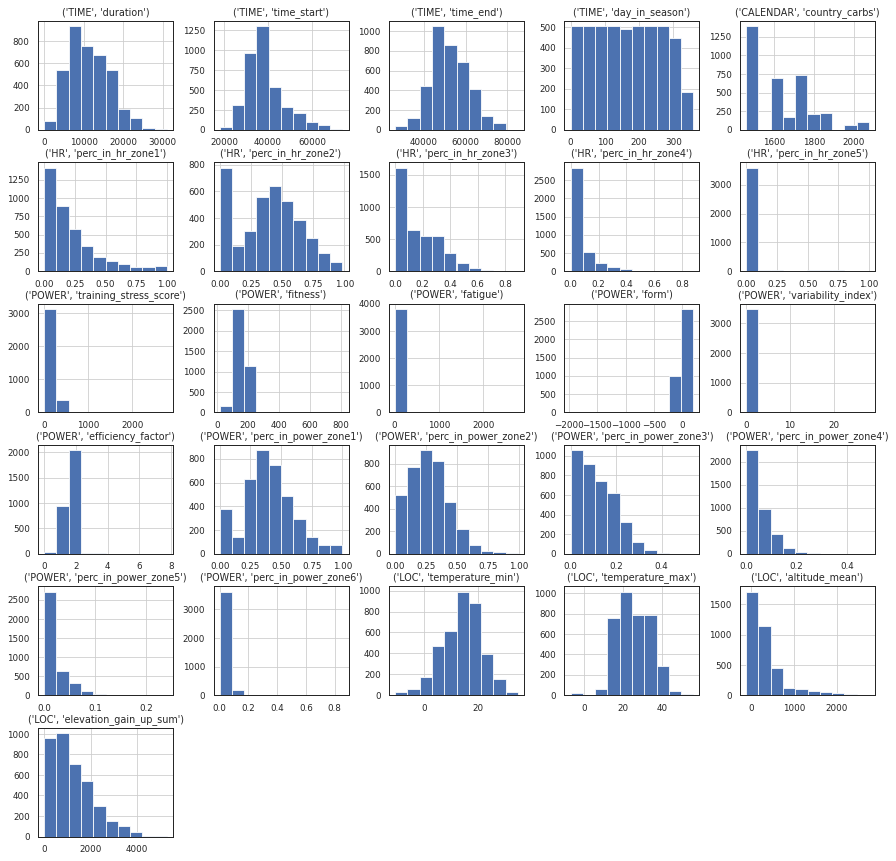

In [96]:
tp_agg[cols_select].hist(figsize=(15,15)) ; plt.show()

Plot correlations

In [97]:
corr = tp_agg[cols_select].corr()

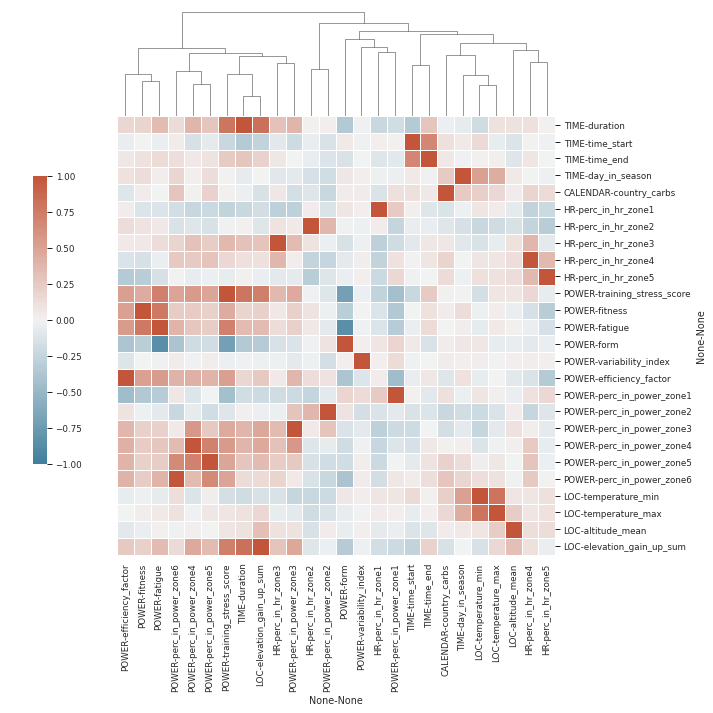

In [98]:
sns.clustermap(corr, vmin=-1, vmax=1, center=0, row_cluster=False, cbar_pos=(0.05, .35, .02, .4),
    linewidths=.5, cmap=sns.diverging_palette(230,20,as_cmap=True))
plt.xlabel('') ; plt.ylabel('') ; plt.show()

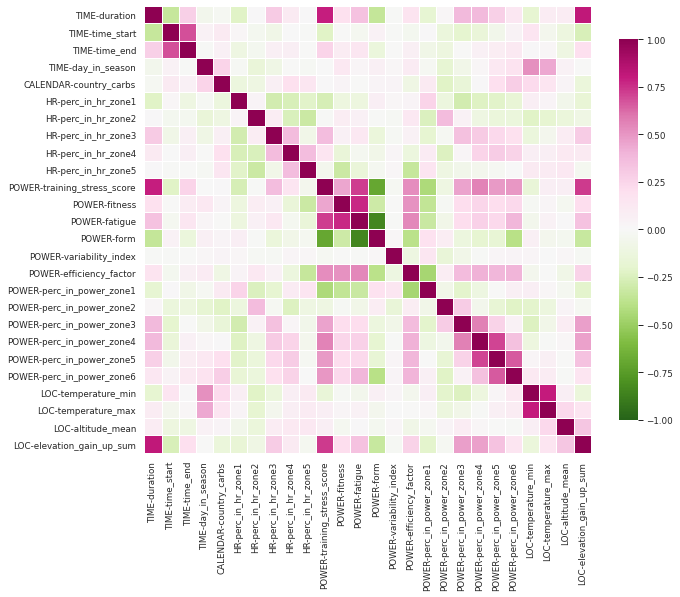

In [99]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap='PiYG_r',
            linewidths=.5, cbar_kws=dict(shrink=0.7), square=True)
plt.xlabel('') ; plt.ylabel('') ; plt.show()

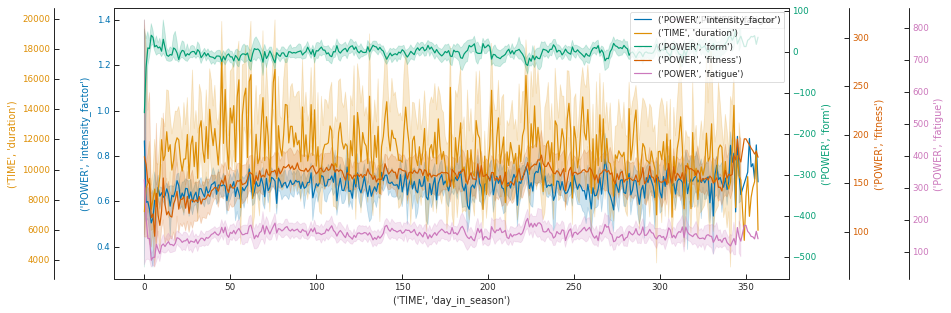

In [200]:
cols_plot = [('POWER', 'intensity_factor'), ('TIME', 'duration'), ('POWER', 'form'), ('POWER', 'fitness'), ('POWER', 'fatigue')]
axlocs = ('left', 'left', 'right', 'right', 'right')

plt.figure(figsize=(15,5)) ; ax = []
ax.append(host_subplot(111, axes_class=AA.Axes))
plt.subplots_adjust(right=0.75)

lr_count = {'left':0, 'right':0}
for i in range(len(cols_plot)):
    ax.append(ax[0].twinx())
    offset = (lr_count[axlocs[i]])*60
    if axlocs[i] == 'left':
        offset *= -1
    ax[i].axis['right'].toggle(all=False)
    new_fixed_axis = ax[i].get_grid_helper().new_fixed_axis
    ax[i].axis[axlocs[i]] = new_fixed_axis(loc=axlocs[i], axes=ax[i], offset=(offset, 0))
    lr_count[axlocs[i]] += 1

for i,c in enumerate(cols_plot):
    sns.lineplot(data=tp_agg, x=('TIME', 'day_in_season'), y=c, ax=ax[i], label=c,
                color=sns.color_palette('colorblind')[i])
    ax[i].axis[axlocs[i]].label.set_color(ax[i].get_lines()[0].get_color())
    ax[i].axis[axlocs[i]].major_ticklabels.set_color(ax[i].get_lines()[0].get_color())

ax[-1].axis['right'].toggle(all=False)
ax[0].axis['top'].toggle(all=False)

ax[0].legend()

plt.show()

1
('POWER', 'normalised_power')
('POWER', 'intensity_factor')


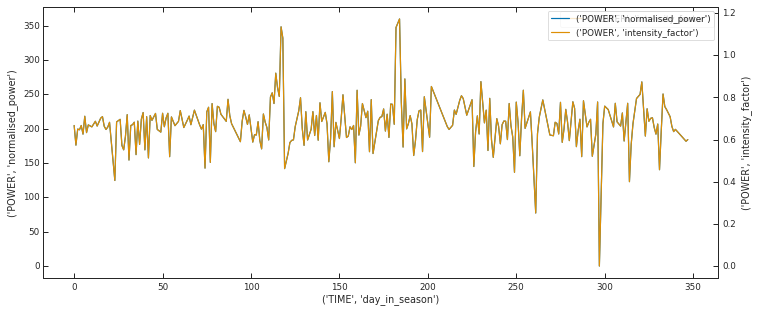

2
('POWER', 'normalised_power')
('POWER', 'intensity_factor')


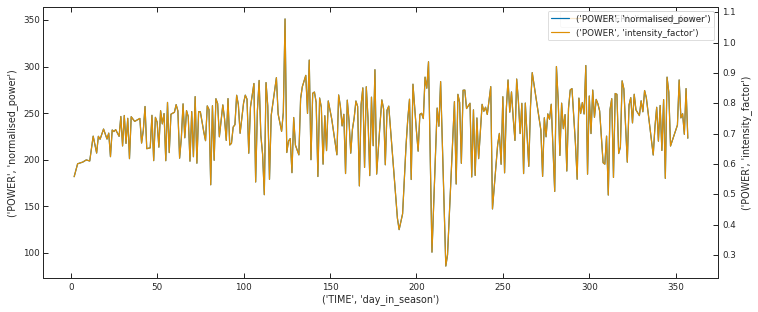

3
('POWER', 'normalised_power')
('POWER', 'intensity_factor')


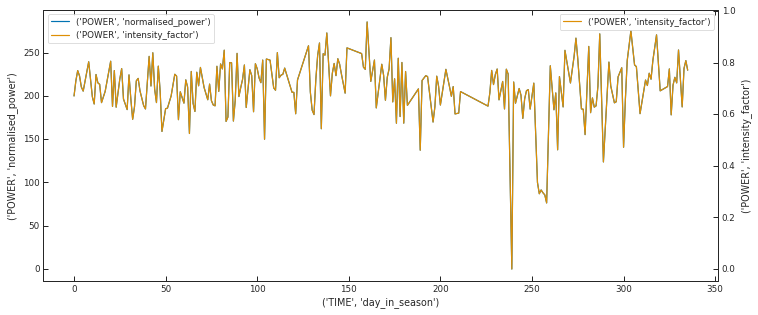

4
('POWER', 'normalised_power')
('POWER', 'intensity_factor')


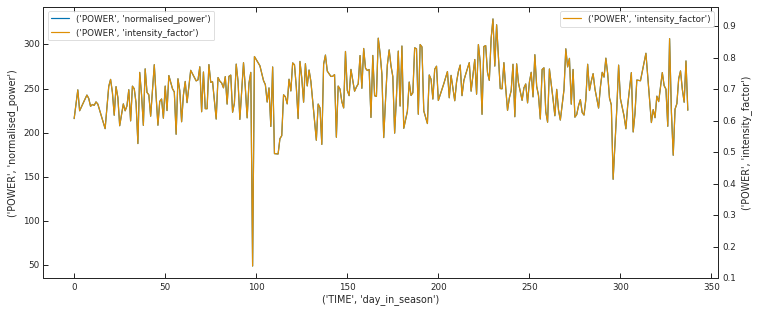

5
('POWER', 'normalised_power')
('POWER', 'intensity_factor')


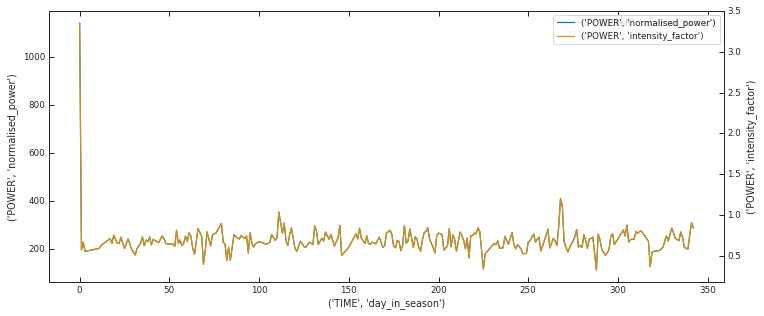

6
('POWER', 'normalised_power')
('POWER', 'intensity_factor')


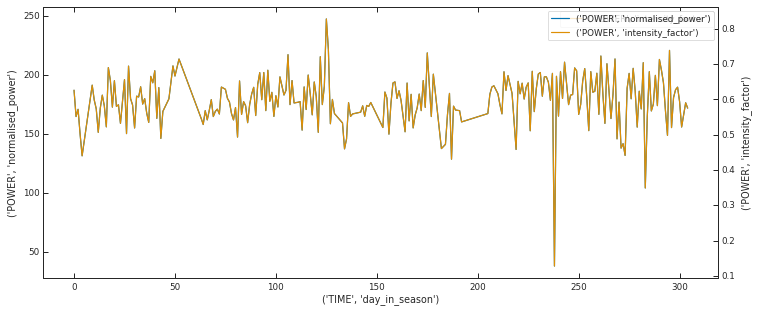

7
('POWER', 'normalised_power')
('POWER', 'intensity_factor')


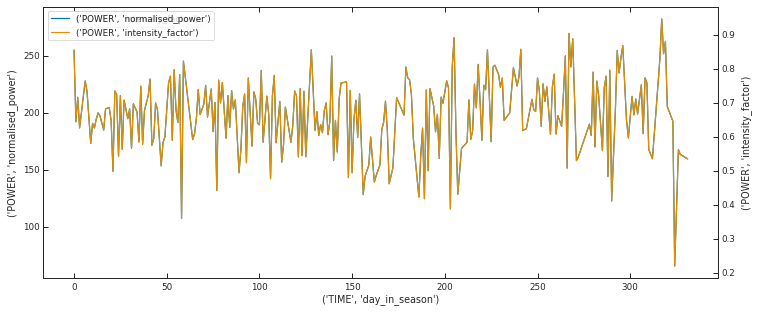

9
('POWER', 'normalised_power')
('POWER', 'intensity_factor')


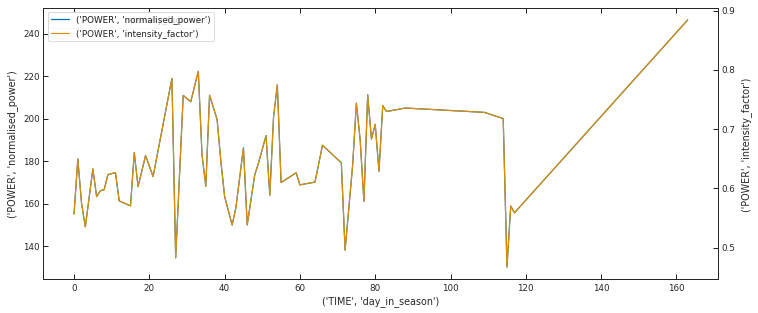

10
('POWER', 'normalised_power')
('POWER', 'intensity_factor')


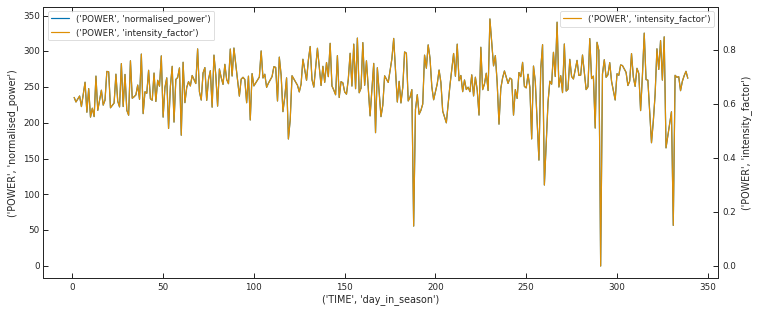

12
('POWER', 'normalised_power')
('POWER', 'intensity_factor')


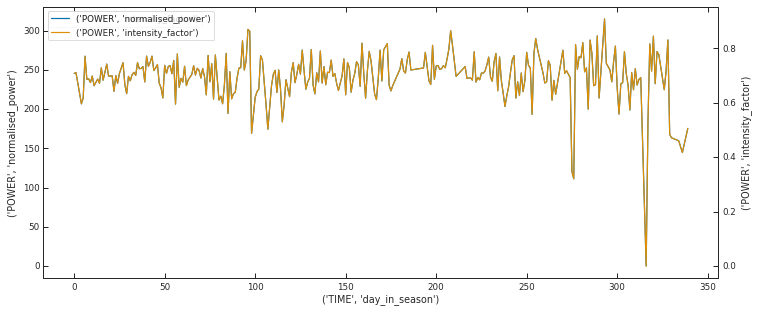

13
('POWER', 'normalised_power')
('POWER', 'intensity_factor')


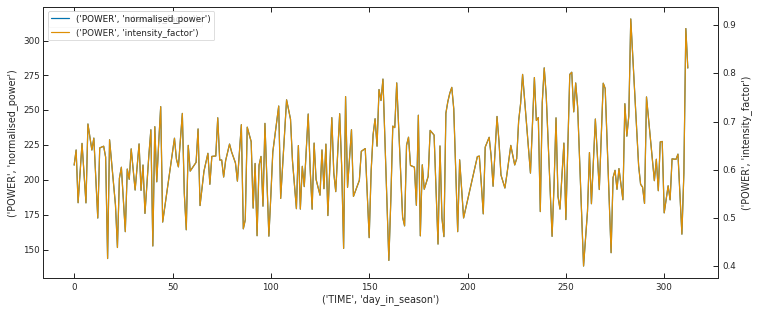

14
('POWER', 'normalised_power')
('POWER', 'intensity_factor')


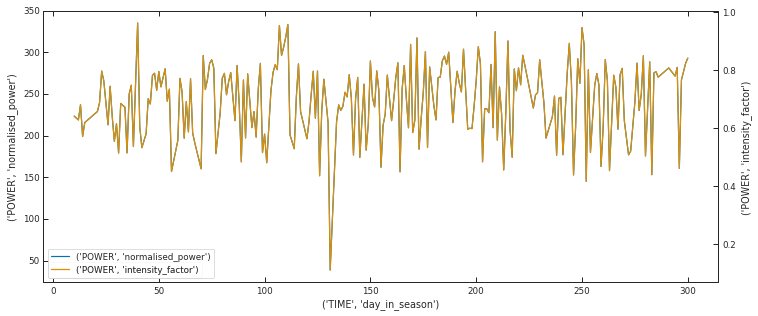

15
('POWER', 'normalised_power')
('POWER', 'intensity_factor')


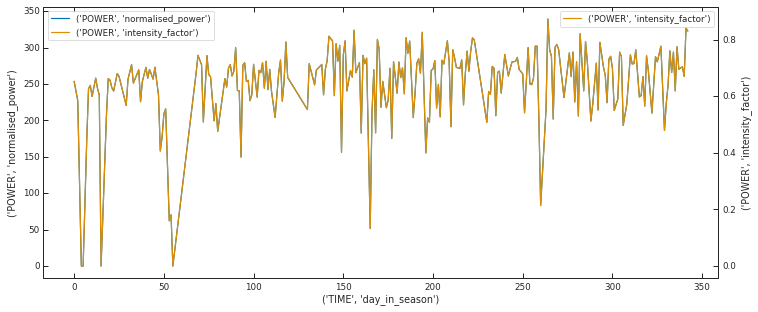

16
('POWER', 'normalised_power')
('POWER', 'intensity_factor')


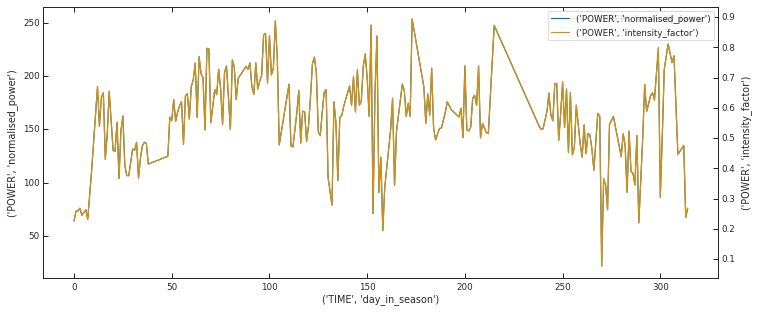

In [160]:
cols_plot = [('POWER', 'normalised_power'), ('POWER', 'intensity_factor')]#, ('POWER', 'form'), ('POWER', 'fitness'), ('POWER', 'fatigue')]
axlocs = ('left', 'right')#, 'right', 'right', 'right')

for n in tp_agg.RIDER.unique():
    print(n)
    plt.figure(figsize=(15,5)) ; ax = []
    ax.append(host_subplot(111, axes_class=AA.Axes))
    plt.subplots_adjust(right=0.75)

    lr_count = {'left':0, 'right':0}
    for i in range(1, len(cols_plot)):
        ax.append(ax[0].twinx())
        if i > 1:
            offset = (lr_count[axlocs[i]]+1)*60
            if axlocs[i] == 'left':
                offset *= -1
                ax[i].axis['right'].toggle(all=False)
            new_fixed_axis = ax[i].get_grid_helper().new_fixed_axis
            ax[i].axis[axlocs[i]] = new_fixed_axis(loc=axlocs[i], axes=ax[i], offset=(offset, 0))
            lr_count[axlocs[i]] += 1
        ax[i].axis[axlocs[i]].toggle(all=True)

    for i,c in enumerate(cols_plot):
        print(c)
        sns.lineplot(data=tp_agg[tp_agg.RIDER == n], x=('TIME', 'day_in_season'), y=c, ax=ax[i], label=c,
                    color=sns.color_palette('colorblind')[i])
        #ax[i].axis[axlocs[i]].label.set_color(px.get_color())
        #ax[i].axis[axlocs[i]].major_ticklabels.set_color(px.get_color())
    plt.legend()
    plt.show()

('POWER', 'normalised_power')


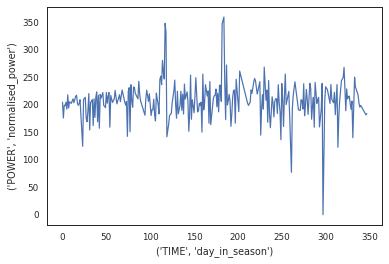

('POWER', 'intensity_factor')


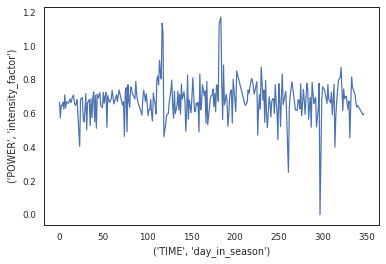

In [159]:
cols_plot = [('POWER', 'normalised_power'), ('POWER', 'intensity_factor')]#, ('POWER', 'form'), ('POWER', 'fitness'), ('POWER', 'fatigue')]
for i,c in enumerate(cols_plot):
    print(c)
    sns.lineplot(data=tp_agg[tp_agg.RIDER == 1], x=('TIME', 'day_in_season'), y=c) ; plt.show()

In [163]:
tp_agg.loc[tp_agg.RIDER == 5, [('date',''), ('POWER', 'normalised_power'), ('POWER', 'intensity_factor')]]

date            POWER                 
                normalised_power intensity_factor
1384 2018-11-12      1144.315575         3.355764
1385 2018-11-13       193.855105         0.568490
1386 2018-11-14       227.657714         0.667618
1387 2018-11-15       188.239579         0.552022
1388 2018-11-16              NaN              NaN
...         ...              ...              ...
1722 2019-10-16              NaN              NaN
1723 2019-10-17       197.625725         0.579548
1724 2019-10-18       256.334457         0.751714
1725 2019-10-19       309.106905         0.906472
1726 2019-10-20       286.677597         0.840697

[343 rows x 3 columns]

## Statistical analysis

#### Prepare data

In [237]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import LeaveOneGroupOut #TODO
from sklearn.utils import shuffle

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [227]:
dc_agg.columns = pd.MultiIndex.from_product([['GLUCOSE'], dc_agg.columns])
dc_agg = dc_agg.reset_index()

In [228]:
data = pd.merge(tp_agg, dc_agg, on=['RIDER', 'date'], how='inner') # TODO: think about how
data = data.drop('date', axis=1)
data

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


RIDER     TIME CALENDAR                                                 \
           duration     race travel race_3d_mean race_7d_mean travel_3d_any   
0        1   7767.0      0.0    0.0          0.0          0.0           0.0   
1        1   8065.0      0.0    0.0          0.0          0.0           0.0   
2        1  11349.0      0.0    0.0          0.0          0.0           0.0   
3        1   7649.0      0.0    0.0          0.0          0.0           0.0   
4        1  11297.0      0.0    0.0          0.0          0.0           0.0   
...    ...      ...      ...    ...          ...          ...           ...   
2115    16  20746.0      0.0    0.0          0.0          0.0           0.0   
2116    16  14070.0      0.0    0.0          0.0          0.0           0.0   
2117    16  14277.0      0.0    0.0          0.0          0.0           0.0   
2118    16   9109.0      0.0    0.0          0.0          0.0           0.0   
2119    16  13628.0      0.0    0.0          0.0          0.0           0.0   

                                              HR  ...         GLUCOSE  \
     travel_7d_any country_carbs heart_rate_mean  ... glucose_std_14d   
0              0.0       1636.37      166.758017  ...       56.730797   
1              0.0       1636.37      156.035338  ...       55.311917   
2              0.0       1636.37      160.294387  ...       52.317500   
3              0.0       1636.37      147.380180  ...       52.083887   
4              0.0       1636.37      145.930854  ...       51.366071   
...            ...           ...             ...  ...             ...   
2115           0.0       1461.09      153.288768  ...       54.756839   
2116           0.0       1461.09      135.252261  ...       57.097125   
2117           0.0       1461.09      140.448904  ...       56.391842   
2118           0.0       1461.09      101.404370  ...       52.783259   
2119           0.0       1461.09      140.324919  ...       54.019556   

                                                                           \
     glucose_cv_14d glucose_rate_14d completeness_14d count_14d  LBGI_14d   
0          0.414416       136.893311         0.878720      3543  1.961196   
1          0.414129       133.562129         0.876240      3533  2.095093   
2          0.413757       126.444982         0.872272      3517  2.634457   
3          0.420814       123.769318         0.876240      3533  2.762454   
4          0.423937       121.164479         0.888145      3581  2.982247   
...             ...              ...              ...       ...       ...   
2115       0.377368       145.101847         0.469990      1895  0.617434   
2116       0.382115       149.424067         0.471974      1903  0.587380   
2117       0.376038       149.963251         0.479167      1932  0.567623   
2118       0.356172       148.195920         0.490327      1977  0.553626   
2119       0.365881       147.642530         0.560020      2258  0.633326   

                                           
      HBGI_14d AUC_14d hypo_14d hyper_14d  
0     3.967461     NaN     True      True  
1     3.627518     NaN     True      True  
2     2.912170     NaN     True      True  
3     2.742233     NaN     True      True  
4     2.578908     NaN     True      True  
...        ...     ...      ...       ...  
2115  2.450178     NaN     True      True  
2116  2.779491     NaN     True      True  
2117  2.817452     NaN     True      True  
2118  2.634646     NaN     True      True  
2119  3.028787     NaN     True      True  

[2120 rows x 442 columns]

**Clean features**

Remove features with more than 30% nan

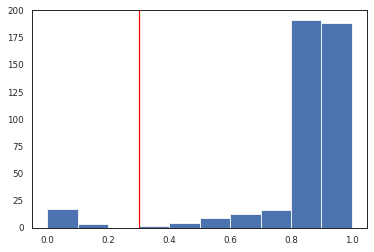

In [229]:
plt.hist(data.notna().sum() / data.shape[0]) ; plt.axvline(0.3, color='red') ; plt.show()

In [230]:
print("Columns with more than 30% nan: ", data.columns[data.notna().sum() / data.shape[0] < 0.3])

Columns with more than 30% nan:  MultiIndex([(  'POWER',                    'cadence_iqr'),
            (  'POWER',         'left_right_balance_iqr'),
            (  'POWER',                      'power_iqr'),
            (  'POWER', 'combined_pedal_smoothness_mean'),
            (  'POWER',  'combined_pedal_smoothness_std'),
            (  'POWER',  'combined_pedal_smoothness_min'),
            (  'POWER',  'combined_pedal_smoothness_max'),
            (  'POWER',  'combined_pedal_smoothness_iqr'),
            (  'POWER', 'right_torque_effectiveness_iqr'),
            (  'POWER',     'right_pedal_smoothness_iqr'),
            (  'POWER',  'left_torque_effectiveness_iqr'),
            (  'POWER',      'left_pedal_smoothness_iqr'),
            (    'LOC',                      'grade_iqr'),
            (    'LOC',                'temperature_iqr'),
            (    'LOC',                'distance_up_iqr'),
            (    'LOC',             'elevation_gain_iqr'),
            (    'LOC',

In [231]:
data = data[data.columns[data.notna().sum() / data.shape[0] >= 0.3]]

In [234]:
data = data.set_index(['RIDER']).astype(float).reset_index()

In [236]:
data

RIDER     TIME CALENDAR                                                 \
           duration     race travel race_3d_mean race_7d_mean travel_3d_any   
0        1   7767.0      0.0    0.0          0.0          0.0           0.0   
1        1   8065.0      0.0    0.0          0.0          0.0           0.0   
2        1  11349.0      0.0    0.0          0.0          0.0           0.0   
3        1   7649.0      0.0    0.0          0.0          0.0           0.0   
4        1  11297.0      0.0    0.0          0.0          0.0           0.0   
...    ...      ...      ...    ...          ...          ...           ...   
2115    16  20746.0      0.0    0.0          0.0          0.0           0.0   
2116    16  14070.0      0.0    0.0          0.0          0.0           0.0   
2117    16  14277.0      0.0    0.0          0.0          0.0           0.0   
2118    16   9109.0      0.0    0.0          0.0          0.0           0.0   
2119    16  13628.0      0.0    0.0          0.0          0.0           0.0   

                                              HR  ...          GLUCOSE  \
     travel_7d_any country_carbs heart_rate_mean  ... glucose_mean_14d   
0              0.0       1636.37      166.758017  ...       136.893311   
1              0.0       1636.37      156.035338  ...       133.562129   
2              0.0       1636.37      160.294387  ...       126.444982   
3              0.0       1636.37      147.380180  ...       123.769318   
4              0.0       1636.37      145.930854  ...       121.164479   
...            ...           ...             ...  ...              ...   
2115           0.0       1461.09      153.288768  ...       145.101847   
2116           0.0       1461.09      135.252261  ...       149.424067   
2117           0.0       1461.09      140.448904  ...       149.963251   
2118           0.0       1461.09      101.404370  ...       148.195920   
2119           0.0       1461.09      140.324919  ...       147.642530   

                                                                       \
     glucose_std_14d glucose_cv_14d glucose_rate_14d completeness_14d   
0          56.730797       0.414416       136.893311         0.878720   
1          55.311917       0.414129       133.562129         0.876240   
2          52.317500       0.413757       126.444982         0.872272   
3          52.083887       0.420814       123.769318         0.876240   
4          51.366071       0.423937       121.164479         0.888145   
...              ...            ...              ...              ...   
2115       54.756839       0.377368       145.101847         0.469990   
2116       57.097125       0.382115       149.424067         0.471974   
2117       56.391842       0.376038       149.963251         0.479167   
2118       52.783259       0.356172       148.195920         0.490327   
2119       54.019556       0.365881       147.642530         0.560020   

                                                       
     count_14d  LBGI_14d  HBGI_14d hypo_14d hyper_14d  
0       3543.0  1.961196  3.967461      1.0       1.0  
1       3533.0  2.095093  3.627518      1.0       1.0  
2       3517.0  2.634457  2.912170      1.0       1.0  
3       3533.0  2.762454  2.742233      1.0       1.0  
4       3581.0  2.982247  2.578908      1.0       1.0  
...        ...       ...       ...      ...       ...  
2115    1895.0  0.617434  2.450178      1.0       1.0  
2116    1903.0  0.587380  2.779491      1.0       1.0  
2117    1932.0  0.567623  2.817452      1.0       1.0  
2118    1977.0  0.553626  2.634646      1.0       1.0  
2119    2258.0  0.633326  3.028787      1.0       1.0  

[2120 rows x 422 columns]

Normalize features

In [238]:
cols_float = data.columns[data.dtypes == float]
scaler = StandardScaler()
data[cols_float] = scaler.fit_transform(data[cols_float])

RIDER     TIME CALENDAR                                                 \
           duration     race travel race_3d_mean race_7d_mean travel_3d_any   
0        1   7767.0      0.0    0.0          0.0          0.0           0.0   
1        1   8065.0      0.0    0.0          0.0          0.0           0.0   
2        1  11349.0      0.0    0.0          0.0          0.0           0.0   
3        1   7649.0      0.0    0.0          0.0          0.0           0.0   
4        1  11297.0      0.0    0.0          0.0          0.0           0.0   
...    ...      ...      ...    ...          ...          ...           ...   
2115    16  20746.0      0.0    0.0          0.0          0.0           0.0   
2116    16  14070.0      0.0    0.0          0.0          0.0           0.0   
2117    16  14277.0      0.0    0.0          0.0          0.0           0.0   
2118    16   9109.0      0.0    0.0          0.0          0.0           0.0   
2119    16  13628.0      0.0    0.0          0.0          0.0           0.0   

                                              HR  ...          GLUCOSE  \
     travel_7d_any country_carbs heart_rate_mean  ... glucose_mean_14d   
0              0.0       1636.37      166.758017  ...       136.893311   
1              0.0       1636.37      156.035338  ...       133.562129   
2              0.0       1636.37      160.294387  ...       126.444982   
3              0.0       1636.37      147.380180  ...       123.769318   
4              0.0       1636.37      145.930854  ...       121.164479   
...            ...           ...             ...  ...              ...   
2115           0.0       1461.09      153.288768  ...       145.101847   
2116           0.0       1461.09      135.252261  ...       149.424067   
2117           0.0       1461.09      140.448904  ...       149.963251   
2118           0.0       1461.09      101.404370  ...       148.195920   
2119           0.0       1461.09      140.324919  ...       147.642530   

                                                                       \
     glucose_std_14d glucose_cv_14d glucose_rate_14d completeness_14d   
0          56.730797       0.414416       136.893311         0.878720   
1          55.311917       0.414129       133.562129         0.876240   
2          52.317500       0.413757       126.444982         0.872272   
3          52.083887       0.420814       123.769318         0.876240   
4          51.366071       0.423937       121.164479         0.888145   
...              ...            ...              ...              ...   
2115       54.756839       0.377368       145.101847         0.469990   
2116       57.097125       0.382115       149.424067         0.471974   
2117       56.391842       0.376038       149.963251         0.479167   
2118       52.783259       0.356172       148.195920         0.490327   
2119       54.019556       0.365881       147.642530         0.560020   

                                                       
     count_14d  LBGI_14d  HBGI_14d hypo_14d hyper_14d  
0       3543.0  1.961196  3.967461      1.0       1.0  
1       3533.0  2.095093  3.627518      1.0       1.0  
2       3517.0  2.634457  2.912170      1.0       1.0  
3       3533.0  2.762454  2.742233      1.0       1.0  
4       3581.0  2.982247  2.578908      1.0       1.0  
...        ...       ...       ...      ...       ...  
2115    1895.0  0.617434  2.450178      1.0       1.0  
2116    1903.0  0.587380  2.779491      1.0       1.0  
2117    1932.0  0.567623  2.817452      1.0       1.0  
2118    1977.0  0.553626  2.634646      1.0       1.0  
2119    2258.0  0.633326  3.028787      1.0       1.0  

[2120 rows x 422 columns]

Impute features

In [ ]:
imputer = SimpleImputer()
data[:] = imputer().fit_transform(data)
# TODO: we shouldn't impute the target feature

Remove multicollinearity with variance inflation factor

In [ ]:
data = add_constant(data)
vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index=data.columns)
data = data[vif.index[vif <= 10].drop('const')]

In [ ]:

# then: get rid of multilevel index


In [ ]:
# TODO: add glucose cols to cols_select

In [ ]:
#### TODO: TrainingPeaks descriptives

# Also, hypo/hyper in different times for different features
# So merge TP and DC

# Glycaemic control over time
# TSS over time

In [14]:
info = pd.read_csv(DATA_PATH+'./info.csv', index_col=0)
info.set_index('RIDER', inplace=True)
info

,age,diabetes_duration,height,weight,bf(%),HbA1c,FTP,LTHR,HRmax,VO2max
RIDER,,,,,,,,,,
1,22.0,11.0,174.0,60.500000,9.066667,6.7,307.000000,176.333333,192.333333,68.888889
2,30.0,14.0,178.0,71.633333,8.833333,6.6,326.000000,168.666667,181.666667,66.915285
3,26.0,7.0,171.0,66.733333,6.566667,6.8,298.000000,171.000000,180.000000,66.666164
4,19.0,7.0,178.0,78.666667,9.433333,7.8,356.000000,170.333333,187.333333,67.333333
5,25.0,6.0,183.0,69.633333,7.700000,6.5,341.000000,179.666667,192.666667,72.857143
6,20.0,9.0,169.0,56.700000,4.950000,6.4,298.500000,173.000000,184.500000,70.781588
10,27.0,17.0,185.0,75.466667,7.700000,7.3,377.333333,177.000000,194.333333,73.982571
12,30.0,8.0,178.0,64.000000,5.600000,6.0,347.000000,158.333333,178.666667,75.937500
13,34.0,1.0,179.0,60.333333,4.866667,6.3,345.666667,173.000000,182.333333,76.666667


In [27]:
percinlevel = {i:get_percinlevel(df[df.RIDER == i]) for i in ATHLETES}
percinlevel = pd.DataFrame(percinlevel).T
percinlevel['hypo'] = percinlevel['hypo L2'] + percinlevel['hypo L1']
percinlevel['hyper'] = percinlevel['hyper L1'] + percinlevel['hyper L2']
percinlevel

,hypo L2,hypo L1,target,hyper L1,hyper L2,hypo,hyper
1,1.209455,6.730493,64.032547,19.491675,8.535830,7.939947,28.027506
2,3.319630,8.091153,66.078939,14.069814,8.224224,11.410783,22.294038
3,1.387432,4.821754,67.102023,20.653035,6.035756,6.209185,26.688791
4,1.772771,3.610159,57.773782,26.127999,10.715289,5.382930,36.843288
5,0.219195,1.275101,83.175026,13.625436,1.596823,1.494296,15.222259
6,0.450731,2.496993,86.588687,9.486084,0.966444,2.947724,10.452528
10,7.973185,6.257463,47.707133,20.995077,17.065047,14.230648,38.060124
12,2.273402,9.284984,83.716633,4.368628,0.326657,11.558386,4.695285
13,0.018693,0.447523,93.712683,5.647369,0.169333,0.466216,5.816702
14,0.309965,1.706257,62.468134,23.988992,11.309386,2.016222,35.298378


In [28]:
diab = pd.concat([info, percinlevel], axis=1)
diab

,age,diabetes_duration,height,weight,bf(%),HbA1c,FTP,LTHR,HRmax,VO2max,hypo L2,hypo L1,target,hyper L1,hyper L2,hypo,hyper
1,22.0,11.0,174.0,60.500000,9.066667,6.7,307.000000,176.333333,192.333333,68.888889,1.209455,6.730493,64.032547,19.491675,8.535830,7.939947,28.027506
2,30.0,14.0,178.0,71.633333,8.833333,6.6,326.000000,168.666667,181.666667,66.915285,3.319630,8.091153,66.078939,14.069814,8.224224,11.410783,22.294038
3,26.0,7.0,171.0,66.733333,6.566667,6.8,298.000000,171.000000,180.000000,66.666164,1.387432,4.821754,67.102023,20.653035,6.035756,6.209185,26.688791
4,19.0,7.0,178.0,78.666667,9.433333,7.8,356.000000,170.333333,187.333333,67.333333,1.772771,3.610159,57.773782,26.127999,10.715289,5.382930,36.843288
5,25.0,6.0,183.0,69.633333,7.700000,6.5,341.000000,179.666667,192.666667,72.857143,0.219195,1.275101,83.175026,13.625436,1.596823,1.494296,15.222259
6,20.0,9.0,169.0,56.700000,4.950000,6.4,298.500000,173.000000,184.500000,70.781588,0.450731,2.496993,86.588687,9.486084,0.966444,2.947724,10.452528
10,27.0,17.0,185.0,75.466667,7.700000,7.3,377.333333,177.000000,194.333333,73.982571,7.973185,6.257463,47.707133,20.995077,17.065047,14.230648,38.060124
12,30.0,8.0,178.0,64.000000,5.600000,6.0,347.000000,158.333333,178.666667,75.937500,2.273402,9.284984,83.716633,4.368628,0.326657,11.558386,4.695285
13,34.0,1.0,179.0,60.333333,4.866667,6.3,345.666667,173.000000,182.333333,76.666667,0.018693,0.447523,93.712683,5.647369,0.169333,0.466216,5.816702
14,27.0,17.0,187.0,75.166667,9.333333,7.1,348.000000,169.000000,189.500000,66.500000,0.309965,1.706257,62.468134,23.988992,11.309386,2.016222,35.298378


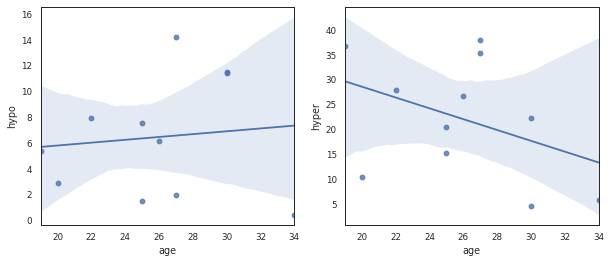

In [34]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
sns.regplot(x='age', y='hypo', data=diab, ax=axs[0])
sns.regplot(x='age', y='hyper', data=diab, ax=axs[1])
plt.show()

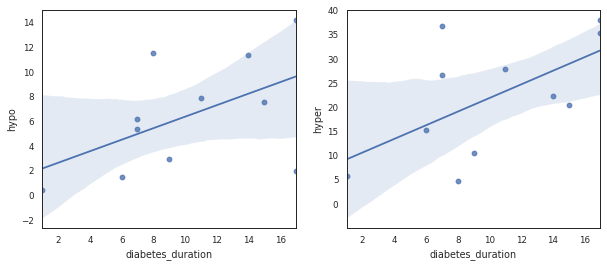

In [37]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
sns.regplot(x='diabetes_duration', y='hypo', data=diab, ax=axs[0])
sns.regplot(x='diabetes_duration', y='hyper', data=diab, ax=axs[1])
plt.show()

In [39]:
import statsmodels.api as sm

diab = sm.add_constant(diab)

model = sm.OLS(diab['hypo'], diab[info.columns])
res = model.fit()
print(res.summary())

model = sm.OLS(diab['hyper'], diab[info.columns])
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   hypo   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.858
Method:                 Least Squares   F-statistic:                              7.657
Date:                Tue, 26 Oct 2021   Prob (F-statistic):                       0.275
Time:                        21:19:31   Log-Likelihood:                         -14.273
No. Observations:                  11   AIC:                                      48.55
Df Residuals:                       1   BIC:                                      52.53
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

/local/home/evanweenen/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/local/home/evanweenen/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


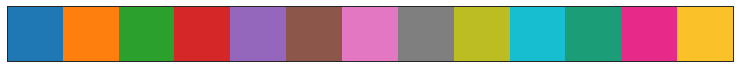

In [196]:
sns.palplot(sns.color_palette('tab10')+[sns.color_palette('Dark2')[0],
                                        sns.color_palette('Dark2')[3],
                                        sns.color_palette('inferno')[-1],
                                        sns.color_palette('inferno')])

In [201]:
sns.color_palette('YlGnBu', n_colors=7)

[(0.9288273740868896, 0.972318339100346, 0.6941637831603229),
 (0.7781776239907728, 0.9128642829680892, 0.7060976547481739),
 (0.4951787773933103, 0.8028604382929643, 0.733748558246828),
 (0.2526874279123414, 0.7114494425221068, 0.7683813917723953),
 (0.11410995770857363, 0.5647058823529412, 0.7510957324106113),
 (0.13361014994232986, 0.3647520184544406, 0.6569780853517878),
 (0.1419761630142253, 0.20144559784698193, 0.5739331026528259)]

In [198]:
sns.color_palette('inferno', n_colors=7)

[(0.129285, 0.047293, 0.290788),
 (0.3415, 0.062325, 0.429425),
 (0.54092, 0.134729, 0.415123),
 (0.735683, 0.215906, 0.330245),
 (0.894305, 0.353399, 0.193584),
 (0.978422, 0.557937, 0.034931),
 (0.974638, 0.797692, 0.206332)]

In [205]:
sns.color_palette('gist_earth_r', n_colors=7)

[(0.8518382084467404, 0.7103140233308513, 0.6171058037787064),
 (0.7389241598191383, 0.6730376114081996, 0.3849495081644698),
 (0.5947984998026056, 0.6844241296518607, 0.3452878910092465),
 (0.35862242511195164, 0.6261367892976589, 0.2930678846538615),
 (0.23071926548397137, 0.5538959866220736, 0.39004938240081705),
 (0.16464755874020998, 0.44614578142248856, 0.49399353175533156),
 (0.08101705271343665, 0.2137804600164292, 0.4712453089602375)]

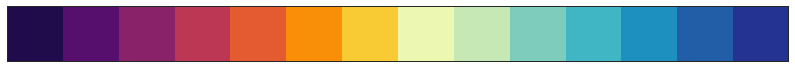

In [202]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('YlGnBu', n_colors=7))

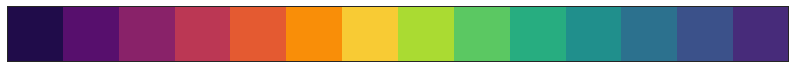

In [212]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('viridis_r', n_colors=7))

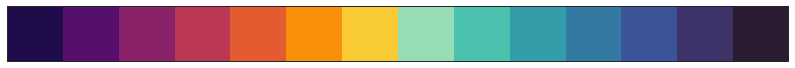

In [208]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('mako_r', n_colors=7))

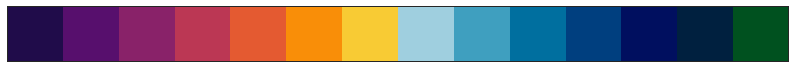

In [210]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('ocean_r', n_colors=7))

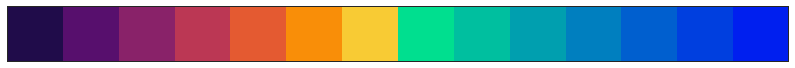

In [215]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('winter_r', n_colors=7))

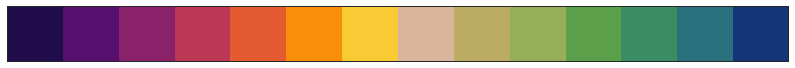

In [206]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('gist_earth_r', n_colors=7))

In [189]:
sns.color_palette('tab20b')

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [170]:
sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [171]:
sns.color_palette('Dark2')

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

In [172]:
sns.color_palette('gist_stern')

[(0.5691674045962472, 0.1411764705882353, 0.2823529411764706),
 (0.28627450980392155, 0.28627450980392155, 0.5725490196078431),
 (0.42745098039215684, 0.42745098039215684, 0.8549019607843137),
 (0.5725490196078431, 0.5725490196078431, 0.6912807676261994),
 (0.7137254901960784, 0.7137254901960784, 0.09052982895285744),
 (0.8588235294117648, 0.8588235294117647, 0.4672586015538292)]

In [169]:
sns.color_palette('brg')

[(0.2823529411764706, 0.0, 0.7176470588235294),
 (0.5725490196078431, 0.0, 0.4274509803921569),
 (0.8549019607843137, 0.0, 0.14509803921568631),
 (0.8549019607843137, 0.1450980392156863, 0.0),
 (0.5725490196078431, 0.42745098039215684, 0.0),
 (0.2823529411764706, 0.7176470588235294, 0.0)]

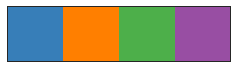

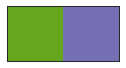

In [234]:
sns.palplot(color_sec.values()) ; plt.show()

sns.palplot([sns.color_palette('Dark2')[4], sns.color_palette('Dark2')[2]]) ; plt.show()

In [2]:
import seaborn as sns
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [3]:
sns.color_palette('Set1')

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [10]:
from plot import palette_ath

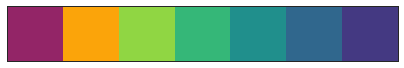

In [48]:
sns.palplot(sns.color_palette('inferno', n_colors=4)[1::2]+sns.color_palette('viridis_r', n_colors=5))

In [141]:
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [142]:
sns.color_palette('Set3')

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [144]:
sns.color_palette('Set1')

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [117]:
sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [145]:
sns.color_palette('tab20', n_colors=14)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058)]

In [147]:
sns.color_palette('tab20b')

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [148]:
sns.color_palette('tab20c')

[(0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235),
 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961)]

In [149]:
sns.color_palette('Paired')

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765)]

In [159]:
sns.color_palette('Dark2')

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

In [203]:
sns.color_palette('gist_stern', n_colors=14)

[(0.9403811230585424, 0.06666666666666667, 0.13333333333333333),
 (0.6082425328554361, 0.13333333333333333, 0.26666666666666666),
 (0.27610394265232974, 0.2, 0.4),
 (0.26666666666666666, 0.26666666666666666, 0.5333333333333333),
 (0.3333333333333333, 0.3333333333333333, 0.6666666666666666),
 (0.4, 0.4, 0.8),
 (0.4666666666666667, 0.4666666666666667, 0.9333333333333333),
 (0.5333333333333333, 0.5333333333333333, 0.8581560283687943),
 (0.6, 0.6, 0.5744680851063828),
 (0.6666666666666667, 0.6666666666666666, 0.2907801418439714),
 (0.7333333333333334, 0.7333333333333333, 0.007092198581559961),
 (0.7999999999999999, 0.8, 0.24528301886792472),
 (0.8666666666666667, 0.8666666666666667, 0.4968553459119498),
 (0.9333333333333333, 0.9333333333333333, 0.7484276729559749)]

In [168]:
sns.color_palette('brg')

[(0.2823529411764706, 0.0, 0.7176470588235294),
 (0.5725490196078431, 0.0, 0.4274509803921569),
 (0.8549019607843137, 0.0, 0.14509803921568631),
 (0.8549019607843137, 0.1450980392156863, 0.0),
 (0.5725490196078431, 0.42745098039215684, 0.0),
 (0.2823529411764706, 0.7176470588235294, 0.0)]

In [162]:
sns.color_palette('CMRmap')

[(0.16941176470588235, 0.15, 0.5323529411764706),
 (0.3870588235294118, 0.16450980392156864, 0.6774509803921569),
 (0.7678431372549019, 0.22098039215686274, 0.3531372549019608),
 (0.9419607843137255, 0.3950980392156863, 0.06294117647058822),
 (0.9, 0.6774509803921569, 0.07098039215686275),
 (0.9, 0.8805882352941177, 0.44823529411764707)]

In [163]:
sns.color_palette('Spectral')

[(0.8853517877739331, 0.3190311418685121, 0.29042675893886966),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243),
 (0.6334486735870821, 0.8521337946943485, 0.6436755094194541),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197)]

In [164]:
sns.color_palette('RdYlBu')

[(0.8899653979238754, 0.2867358708189158, 0.19815455594002307),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6153018069973087),
 (0.9118031526336026, 0.9658592848904267, 0.9111880046136099),
 (0.6409842368319879, 0.8272971933871589, 0.90080738177624),
 (0.346482122260669, 0.5492502883506344, 0.7527104959630911)]

In [165]:
sns.color_palette('plasma')

[(0.32515, 0.006915, 0.639512),
 (0.546157, 0.038954, 0.64701),
 (0.723444, 0.196158, 0.538981),
 (0.85975, 0.360588, 0.406917),
 (0.95547, 0.533093, 0.28549),
 (0.994495, 0.74088, 0.166335)]

In [166]:
sns.color_palette('inferno')

[(0.15585, 0.044559, 0.325338),
 (0.397674, 0.083257, 0.433183),
 (0.621685, 0.164184, 0.388781),
 (0.832299, 0.283913, 0.257383),
 (0.961293, 0.488716, 0.084289),
 (0.981173, 0.759135, 0.156863)]

In [167]:
sns.color_palette('rocket')

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]